# Comments

1. (07/25/25) We sat with Jaime and went over all the metrics. Turns out getting the max(abs_value()) of the each row was basically making oppositely activated, same-areas motifs equivalent (e.g., in motif A, eyes move, mouth closes; motif B, eyes does not move, mouth opens; would be equivalent). Taking out the abs_value() gives significant results.

# Setup

In [8]:
import numpy as np
import pandas as pd
from one.api import ONE
from psyfun import io
from psyfun.config import *
from psyfun import plots
import matplotlib as pl
from matplotlib import pyplot as plt

one = ONE()

# only run if first-time setup
# Fetching all session, insertion, and spike data
#%run -i fetchdata.py -a

# Load session and insertion metadata
df_sessions = pd.read_parquet(paths['sessions'])
df_insertions = pd.read_parquet(paths['insertions'])

# dropping na (PCA_DC)
df_sessions = df_sessions.query('n_tasks >= 2').dropna(subset=['task00_spontaneous_start', 'task01_spontaneous_start'])
df_sessions = df_sessions[df_sessions['eid'] != 'e31bff07-d66c-4a03-894d-f71030161ead']

# this one has less than 9 neurons in the spikes recording
df_sessions = df_sessions[df_sessions['eid'] != '58ca39c5-e27f-43c4-8516-2ccc4fe88042']
df_sessions = df_sessions[df_sessions['eid'] != '8868dff6-f4a6-4e84-b62c-24a0c97803c4']

# Create a DataFrame with eids (all sessions with a left vid), categorized by experimental group
eids_exp = df_sessions.loc[(df_sessions['raw_video_data/_iblrig_leftCamera.raw.mp4'] == True) & (df_sessions['control_recording'] == False), 'eid']
eids_cont = df_sessions.loc[(df_sessions['raw_video_data/_iblrig_leftCamera.raw.mp4'] == True) & (df_sessions['control_recording'] == True), 'eid']



### setup experimental

In [ ]:
# Import dataframe with PCA results entries (eid, epoch_name, filepath)
#CHANGE TO REPO LOCATION
exp_results = pd.read_csv(r'C:\Users\marti\Documents\mainen\psychedelics\video_data\exp_results')

exp_results = exp_results[exp_results['eid'] != '58ca39c5-e27f-43c4-8516-2ccc4fe88042']
exp_results = exp_results[exp_results['eid'] != 'e31bff07-d66c-4a03-894d-f71030161ead']
exp_results = exp_results[exp_results['eid'] != '8868dff6-f4a6-4e84-b62c-24a0c97803c4']

# Correct the epoch_name for easier access (otherwise interval stamps mess up possible grouping)
# Assumes consecutive loading (each eid, 6 sorted epochs)
epoch_naming = ['pre_spo', 'pre_rfm', 'pre_rep', 'post_spo', 'post_rfm', 'post_rep']

for eid, group in exp_results.groupby('eid'):
    idx = group.index
    if len(idx) == len(epoch_naming):
        exp_results.loc[idx, 'epoch'] = epoch_naming
    else:
        print(f"Warning: eid {eid} has {len(idx)} entries, expected {len(epoch_naming)}")

### setup control

In [10]:
# Import dataframe with PCA results entries (eid, epoch_name, filepath)
cont_results = pd.read_csv(r'C:\Users\marti\Documents\mainen\psychedelics\video_data\cont_results')

cont_results = cont_results[cont_results['eid'] != '58ca39c5-e27f-43c4-8516-2ccc4fe88042']
cont_results = cont_results[cont_results['eid'] != 'e31bff07-d66c-4a03-894d-f71030161ead']


# Correct the epoch_name for easier access (otherwise interval stamps mess up possible grouping)
# Assumes consecutive loading (each eid, 6 sorted epochs)
epoch_naming = ['pre_spo', 'pre_rfm', 'pre_rep', 'post_spo', 'post_rfm', 'post_rep']

for eid, group in cont_results.groupby('eid'):
    idx = group.index
    if len(idx) == len(epoch_naming):
        cont_results.loc[idx, 'epoch'] = epoch_naming
    else:
        print(f"Warning: eid {eid} has {len(idx)} entries, expected {len(epoch_naming)}")

In [11]:
# to test cumulative effect
eid_ss1 = df_sessions[df_sessions['session_n'] == 1]

eid1_exp = eid_ss1[eid_ss1['control_recording'] == False]
eid1_cont = eid_ss1[eid_ss1['control_recording'] == True]

eid1_exp
eid1_cont

,LSD_admin,alf/probe00/pykilosort/spikes.times.npy,alf/probe01/pykilosort/spikes.times.npy,alf/task_00/_ibl_passivePeriods.intervalsTable.csv,alf/task_01/_ibl_passivePeriods.intervalsTable.csv,alf/task_02/_ibl_passivePeriods.intervalsTable.csv,control_recording,eid,lab,n_probes,...,videoRight_focus_qc,videoRight_framerate,videoRight_framerate_qc,videoRight_pin_state_qc,videoRight_position_qc,videoRight_qc,videoRight_resolution_qc,videoRight_timestamps_qc,videoRight_wheel_alignment_qc,session_n
29,1346.0,False,False,True,False,False,True,c7cf8e25-1e2c-4b03-a5f5-5a049f1cd228,mainenlab,2,...,PASS,150.769,PASS,PASS,PASS,WARNING,PASS,PASS,WARNING,1
33,1044.0,False,False,True,False,False,True,3e9d9490-7fb2-4aa3-b8cd-83f216ad8cde,mainenlab,2,...,PASS,150.769,PASS,PASS,PASS,WARNING,PASS,PASS,WARNING,1
35,1145.0,False,False,True,False,False,True,e8128c55-b322-438a-9498-edd47ae4b794,mainenlab,2,...,PASS,150.769,PASS,PASS,PASS,WARNING,PASS,PASS,WARNING,1
41,1084.0,False,False,True,False,False,True,bb0e0ad2-4c98-4c98-b92f-559683e8a6f3,mainenlab,2,...,PASS,150.769,PASS,PASS,PASS,WARNING,PASS,PASS,WARNING,1


### functions

In [12]:
LSD_CONT_palette =  ['mediumorchid','mediumseagreen']

In [ ]:
import os
import numpy as np
import pandas as pd

def download_video(eid, camera = "left"):
    """
    Downloads raw video data from specific session. Camera parameter can be switched to "body" and "right".
    
    Parameters
    ----------
    eid (str): Experiment/session identifier

    camera (str): Camera orientation identifier (left by default). "body", "right" are other available options.

    Returns
    -------
    video_path: Local path for saved video
    """
    
    if camera == "left":
        video_path = one.load_dataset(eid, f'*leftCamera.raw*', collection='raw_video_data')
    elif camera == "right":
        video_path = one.load_dataset(eid, f'*rightCamera.raw*', collection='raw_video_data')
    elif camera == "body":
        video_path = one.load_dataset(eid, f'*bodyCamera.raw*', collection='raw_video_data')
    else:
         raise ValueError(f"Unknown camera parameter: {camera}")

    return video_path

def get_time_epochs(df_sessions, eid):

    video_data = df_sessions.loc[df_sessions['eid'] == eid]
    
    # epochs
    epoch_pre = [
        ("task00_spontaneous", video_data['task00_spontaneous_start'].values[0], video_data['task00_spontaneous_stop'].values[0]),
        ("task00_rfm", video_data['task00_rfm_start'].values[0], video_data['task00_rfm_stop'].values[0]),
        ("task00_replay", video_data['task00_replay_start'].values[0], video_data['task00_replay_stop'].values[0])
    ]

    epoch_post = [
        ("task01_spontaneous", video_data['task01_spontaneous_start'].values[0], video_data['task01_spontaneous_stop'].values[0]),
        ("task01_rfm", video_data['task01_rfm_start'].values[0], video_data['task01_rfm_stop'].values[0]),
        ("task01_replay", video_data['task01_replay_start'].values[0], video_data['task01_replay_stop'].values[0])
    ]

    return epoch_pre, epoch_post


# will be useful for multi-video analysis at the end
def load_pca_results(results, eid, epoch_name):
    """
    Imports MotionMap results on motion energy video analysis. Obtains path for .npy file based on eid, loads, and returns the data
    in a dataframe.

    Parameters
    ----------
    results: pd.DataFrame
        Dataframe containing PCA results containing eid, epoch_name, savename
    eid: str
        Experiment/session identifier.
    epoch_name: str
        Epoch identifier. Can take the values of 'spontaneous','rfm', or 'replay'

    Returns
    -------
    pre, post: pd. Dataframe
        MotionMap results for pre/post particular epochs.
    """
        

    path_df = results[results['eid'] == eid]

    if epoch_name == 'spontaneous':
        pre = np.load(path_df[path_df['epoch'] == 'pre_spo']['savename'].values[0], allow_pickle=True).item()
        post = np.load(path_df[path_df['epoch'] == 'post_spo']['savename'].values[0], allow_pickle=True).item()

    elif epoch_name == 'rfm':
        pre = np.load(path_df[path_df['epoch'] == 'pre_rfm']['savename'].values[0], allow_pickle=True).item()
        post = np.load(path_df[path_df['epoch'] == 'post_rfm']['savename'].values[0], allow_pickle=True).item()

    elif epoch_name == 'replay':
        pre = np.load(path_df[path_df['epoch'] == 'pre_rep']['savename'].values[0], allow_pickle=True).item()
        post = np.load(path_df[path_df['epoch'] == 'post_rep']['savename'].values[0], allow_pickle=True).item()

    else:
        raise NameError(f"Epoch name not recognized {epoch_name}")
    return pre, post

def get_eigen(epoch_result, reshaped = False):
    """
    Returns eigenmasks (spatial loadings), temporal projections, and eigenvalues for a specific load_pca_results output.
    Reshape returns eigenmasks reshaped to match frame dimensions (useful for plotting).

    Parameters
    ----------
    epoch_result: np.array
        A pre/post array containing the video PCA results upon load_pca_results() call.
    reshaped: True
        Flag for returning reshaped eigenmasks
    
    """
   # Eigenfaces: each 
    eigenmsk = epoch_result['motMask'] # binned pixels x components
    eigenmsk=np.stack(eigenmsk[0], axis = 0)
    print("Eigenmask matrix has shape ", eigenmsk.shape)

    # Temporal masks: full video, frame-level SVD (frame x component)
    frame_masks = epoch_result['motSVD']
    print("Temporal PC matrix has shape", frame_masks.shape)
 

    # singular values: they are in order (sanity check)
    eigenval = epoch_result['motSv']**2
    print("singular value array has shape ", eigenval.shape)

    if reshaped:
        # Reshaped eigenfaces
        re_eigenmsk = epoch_result['motMask_reshape'] # reshaped by bins (x, y, components)
        re_eigenmsk=np.stack(re_eigenmsk[0], axis = 0)
        return re_eigenmsk, frame_masks, eigenval
    else:
        return eigenmsk, frame_masks, eigenval

# Binarize each component time series and compute LZC
# Traspose temporal data if needed (shape must by n_comps, n_frames)
import antropy as ant
def compute_lz_entropy(temporal_pca, threshold='median', n_comps = 500):
    """
    Computes the Lempel-Ziv entropy of an eigenmask frame projection.
    Each row tells how much that PC (row-indexed) was present in a particular frame.
    The algorithm binarizes by a given threshold (1 if PC was sufficiently present, 0 otherwise),
    and uses the resulting binary string to calculate the Zempel-Ziv entropy.

    Zempel-Ziv measures the richness of patterns found in a binary string. In our case, the metric is
    a proxy for the frequency and complexity  of motif appearance across the video.
    
    Parameters
    ----------
    temporal_pca: np.array
        Array of shape (n_components, n_frames) containing the embeddings of eigenmasks onto the video.
    threshold: string
        Determines the threshold method to binarize. If not median, then a number (float) must be given.
    n_comps: int
        Number of components to keep. >150 explains at least 80% of variance in all sessions.

    Returns
    -------
    lz_scores: np.array
        Array of shape (n_comps,) with the corresponding LZ entropy for each Principal Component (eigenmask)
    """
    lz_scores = []
    
    for comp in temporal_pca[:n_comps,]:
        if threshold == 'median':
            binary = (comp > np.median(comp)).astype(int)
        else:
            binary = (comp > threshold).astype(int)
        lz = ant.lziv_complexity(binary, normalize=True)
        lz_scores.append(lz)
    return np.array(lz_scores)

from sklearn.metrics.pairwise import cosine_similarity
from psyfun import util

# WARNING: still has some bugs, especially for entropy
def extract_measure(exp_results, cont_results, metric, n_comps = 500):
    """
    Helper function to optimize metric extraction from MotionMap results.

    Parameters
    ---------

    exp_results, cont_results: dict
        Dictionaries with eid and paths for individual session's results.
    metric: string
        Metric to be extracted. Method only supports 'similarity' (cosine similarity on eigenmasks),
        'entropy' (Lempel-Ziv entropy on temporal proj.), and 'powerlaw' (power law variance slope).
    n_comps: int
        Number of components to keep in the analysis. >150 explains at least 80% variance in all sessions.

    Results
    -------
    all_data: pd.DataFrame
        Dataframe with all results. Columns include eid (experimental id), epoch (Passive Protocol Epoch),
        time (pre/post), condition (LSD/Saline), and the metric value.
    """

    assert metric == 'similarity' or metric == 'entropy' or metric == 'powerlaw'

    k = n_comps # <-- components to keep

    experimental = []
    for eid in exp_results['eid'].unique():
        for epoch in ['spontaneous', 'rfm', 'replay']:

            pre, post = load_pca_results(exp_results, eid, epoch_name=epoch)

            pre_eigenmsk, pre_temp, pre_eigenval = get_eigen(pre)
            post_eigenmsk, post_temp, post_eigenval = get_eigen(post)

            # metric computation
            if metric == 'entropy':
                # traspose for functionality
                pre_temp = pre_temp.T
                post_temp = post_temp.T

                metric_pre = compute_lz_entropy(pre_temp,k)
                metric_post = compute_lz_entropy(post_temp,k)

                experimental.append((eid, epoch, metric_pre, 'pre'))
                experimental.append((eid, epoch, metric_post, 'post'))
            
            elif metric == 'powerlaw':
                metric_pre = util.power_law_slope(pre_eigenval,k)
                metric_post = util.power_law_slope(post_eigenval,k)

                experimental.append((eid, epoch, metric_pre, 'pre'))
                experimental.append((eid, epoch, metric_post, 'post'))

            elif metric == 'similarity':
                similarity_matrix = cosine_similarity(pre_eigenmsk.T[:k,:], post_eigenmsk[:,:k].T)

                max_similarity = np.max(similarity_matrix)
                experimental.append((eid, epoch, np.mean(max_similarity)))
                

    ## control case
    control = []
    for eid in cont_results['eid'].unique():
        for epoch in ['spontaneous', 'rfm', 'replay']:
            pre, post = load_pca_results(cont_results, eid, epoch_name=epoch)

            pre_eigenmsk, pre_temp, pre_eigenval = get_eigen(pre)
            post_eigenmsk, post_temp, post_eigenval = get_eigen(post)

            # metric computation
            if metric == 'entropy':
                # traspose for functionality
                pre_temp = pre_temp.T
                post_temp = post_temp.T

                metric_pre = compute_lz_entropy(pre_temp,k)
                metric_post = compute_lz_entropy(post_temp,k)

                control.append((eid, epoch, metric_pre, 'pre'))
                control.append((eid, epoch, metric_post, 'post'))
            
            elif metric == 'powerlaw':
                metric_pre = util.power_law_slope(pre_eigenval,k)
                metric_post = util.power_law_slope(post_eigenval,k)

                control.append((eid, epoch, metric_pre, 'pre'))
                control.append((eid, epoch, metric_post, 'post'))
                
            elif metric == 'similarity':
                similarity_matrix = cosine_similarity(pre_eigenmsk.T[:k,:], post_eigenmsk[:,:k].T)

                max_similarity = np.max(similarity_matrix)
                control.append((eid, epoch, np.mean(max_similarity)))


    #  dataframe creation
    if metric != 'similarity':
        exp_data = pd.DataFrame(experimental, columns = ['eid', 'epoch', f'{metric}', 'time'])
        control_data = pd.DataFrame(control, columns = ['eid', 'epoch', f'{metric}', 'time'])

        exp_data['condition'] = 'LSD'
        control_data['condition'] = 'Saline'
        all_data = pd.concat([exp_data, control_data], ignore_index=True)

        # categories
        all_data['condition'] = all_data['condition'].astype('category')
        all_data['epoch'] = all_data['epoch'].astype('category')
        all_data['epoch'] = pd.Categorical(all_data['epoch'], categories=['spontaneous', 'rfm', 'replay'], ordered=True)

        all_data['time'] = all_data['time'].astype('category')
        all_data['time'] = pd.Categorical(all_data['time'], categories=['pre', 'post'], ordered=True)

        return all_data

    else:
        exp_data = pd.DataFrame(experimental, columns = ['eid', 'epoch', 'avg_sim'])
        control_data = pd.DataFrame(control, columns = ['eid', 'epoch', 'avg_sim'])
        exp_data['condition'] = 'LSD'
        control_data['condition'] = 'Saline'
        all_data = pd.concat([exp_data, control_data], ignore_index=True)

        #Categories
        all_data['condition'] = all_data['condition'].astype('category')
        all_data['epoch'] = all_data['epoch'].astype('category')
        all_data['epoch'] = pd.Categorical(all_data['epoch'], categories=['spontaneous', 'rfm', 'replay'], ordered=True)
        return all_data

# Analysis

## Raw Motion Energy

### Motivation plots

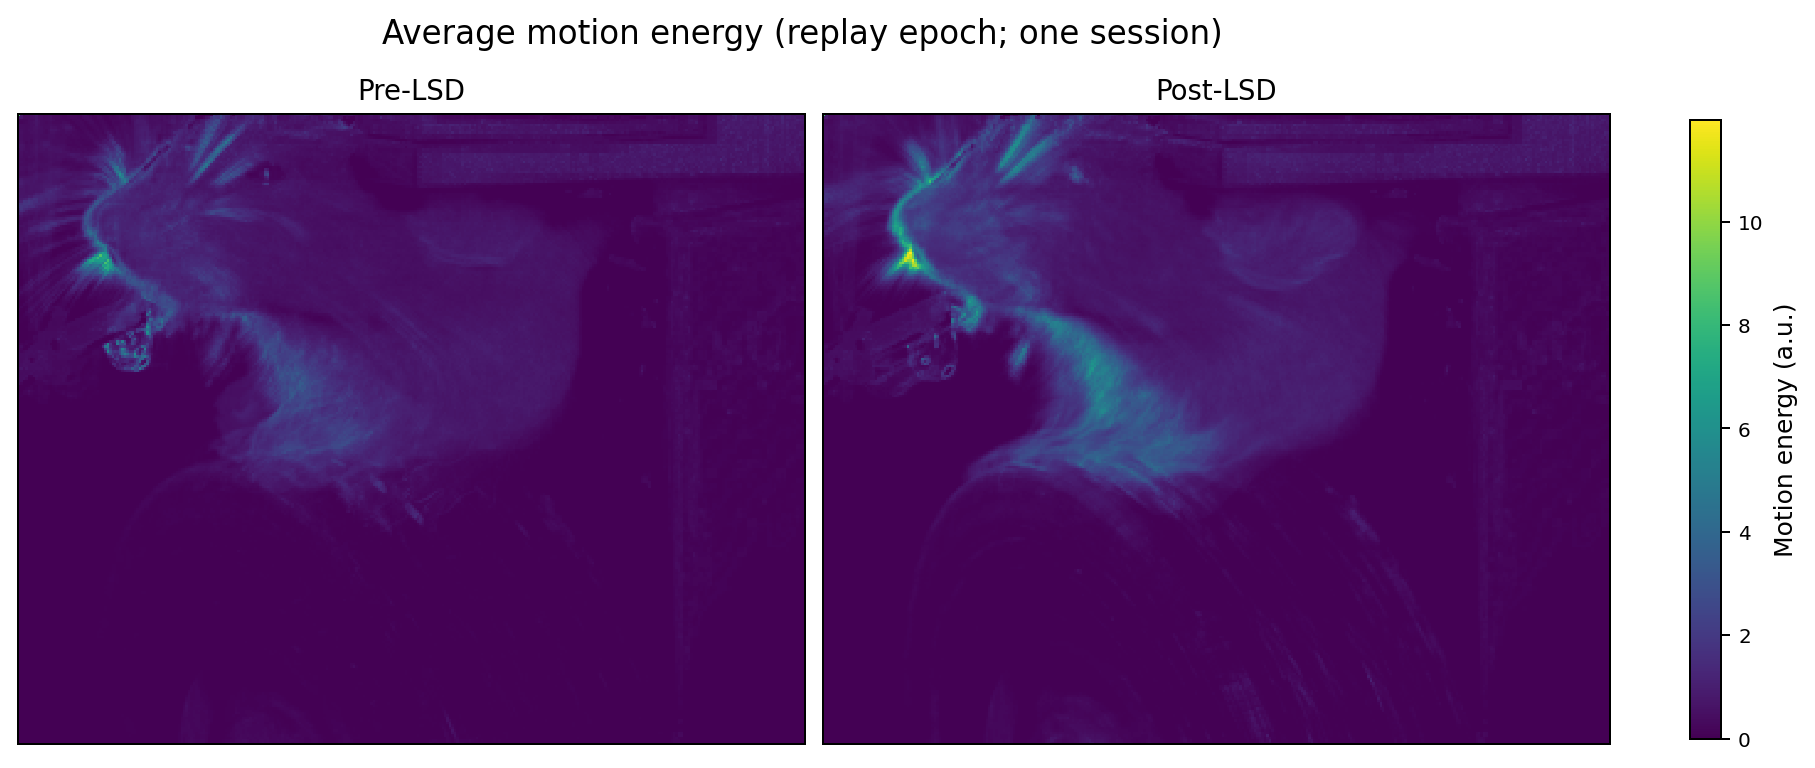

In [33]:
import matplotlib.pyplot as plt

eid1 = exp_results['eid'].unique()[0]

pre1, post1 = load_pca_results(exp_results, eid1, epoch_name = 'replay')

avg_motion_pre = pre1.get('avgmotion_reshape')
avg_motion_post = post1.get('avgmotion_reshape')


# Set clean, readable font style
plt.rcParams.update({
    'font.size': 11,
    'font.family': 'sans-serif',
    'axes.titlesize': 11,
    'axes.titleweight': 'normal'
})

# Create figure
fig, axs = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

# Shared color limits
vmin = min(avg_motion_pre.min(), avg_motion_post.min())
vmax = max(avg_motion_pre.max(), avg_motion_post.max())

# Plot both images with the same colormap
im0 = axs[0].imshow(avg_motion_pre, cmap='viridis', vmin=vmin, vmax=vmax, interpolation='nearest')
im1 = axs[1].imshow(avg_motion_post, cmap='viridis', vmin=vmin, vmax=vmax, interpolation='nearest')

# Style individual subplots
for ax, title in zip(axs, ["Pre-LSD", "Post-LSD"]):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title)
    for spine in ax.spines.values():
        spine.set_visible(True)

# Add colorbar
cbar = fig.colorbar(im1, ax=axs, shrink=0.9, location='right')
cbar.set_label('Motion energy (a.u.)', fontsize = 10)

# Centered, clean figure title
fig.suptitle("Average motion energy (replay epoch; one session)", fontsize=13, x = 0.44, y=1.06)

plt.show()


Eigenmask matrix has shape  (81920, 500)
Temporal PC matrix has shape (18120, 500)
singular value array has shape  (500,)
Eigenmask matrix has shape  (81920, 500)
Temporal PC matrix has shape (18120, 500)
singular value array has shape  (500,)


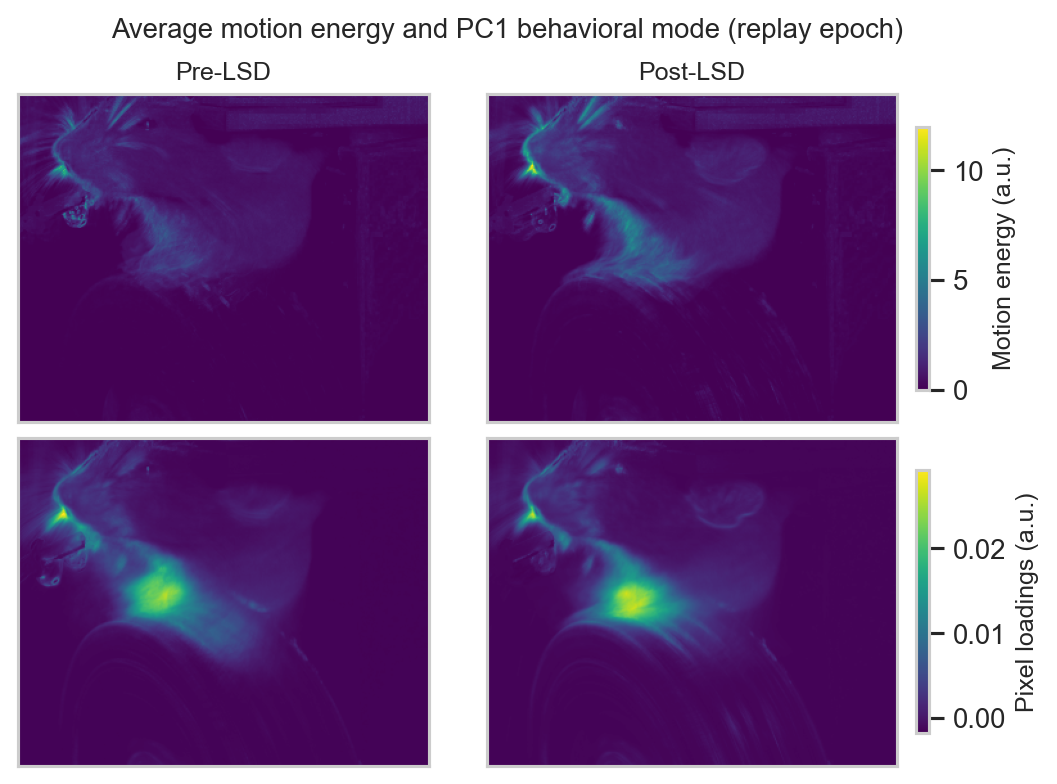

In [886]:
import matplotlib.pyplot as plt

# Font setup
plt.rcParams.update({
    'font.size': 11,
    'font.family': 'sans-serif',
    'axes.titlesize': 11,
    'axes.titleweight': 'normal'
})

eid1 = exp_results['eid'].unique()[0]
pre_data, post_data = load_pca_results(exp_results, eid1, epoch_name = 'replay')

# Extract data
pre_PC,_,_= get_eigen(pre_data, reshaped=True)
post_PC,_,_= get_eigen(post_data, reshaped=True)


PC1_pre = pre_PC[:, :, 0]
PC1_post = post_PC[:, :, 0]

# Color limits
vmin_pc = min(PC1_pre.min(), PC1_post.min())
vmax_pc = max(PC1_pre.max(), PC1_post.max())
vmin_mot = min(avg_motion_pre.min(), avg_motion_post.min())
vmax_mot = max(avg_motion_pre.max(), avg_motion_post.max())

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(6, 4), constrained_layout=True)
# Plot motion energy maps
im0 = axs[0, 0].imshow(avg_motion_pre, cmap='viridis', vmin=vmin_mot, vmax=vmax_mot)
im1 = axs[0, 1].imshow(avg_motion_post, cmap='viridis', vmin=vmin_mot, vmax=vmax_mot)

# Plot PC1 loading maps
im2 = axs[1, 0].imshow(PC1_pre, cmap='viridis', vmin=vmin_pc, vmax=vmax_pc)
im3 = axs[1, 1].imshow(PC1_post, cmap='viridis', vmin=vmin_pc, vmax=vmax_pc)

# Titles
axs[0, 0].set_title("Pre-LSD", fontsize = 10)
axs[0, 1].set_title("Post-LSD", fontsize = 10)

# Remove ticks and show borders
for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ax.spines.values():
        spine.set_visible(True)

# Colorbars
cbar0 = fig.colorbar(im0, ax=axs[0, :], orientation='vertical', shrink=0.8, pad=0.02)
cbar0.set_label("Motion energy (a.u.)", fontsize=10)

cbar1 = fig.colorbar(im2, ax=axs[1, :], orientation='vertical', shrink=0.8, pad=0.02)
cbar1.set_label("Pixel loadings (a.u.)", fontsize=10)
3
# Global title
fig.suptitle("Average motion energy and PC1 behavioral mode (replay epoch)", fontsize=11, y=1.05)

plt.show()

### Average Motion Energy changes

#### LSD

In [887]:
# differences
diff_spo_exp = []
diff_rfm_exp = []
diff_rep_exp = []

# computing the average motion energy difference
# between pre/post phases (per protocol epoch)
for eid in exp_results['eid'].unique():
    
    # spontaneous
    pre1, post1 = load_pca_results(exp_results, eid, epoch_name = 'spontaneous')

    # substracting by bin
    avg_motion_pre = pre1.get('avgmotion_reshape')
    avg_motion_post = post1.get('avgmotion_reshape')
    diff_spo_exp.append((eid, 'spontaneous', np.diff([avg_motion_pre, avg_motion_post], axis = 0).mean(axis=0).flatten()))

    # rfm
    pre1, post1 = load_pca_results(exp_results, eid, epoch_name = 'rfm')
    avg_motion_pre = pre1.get('avgmotion_reshape')
    avg_motion_post = post1.get('avgmotion_reshape')
    diff_rfm_exp.append((eid, 'rfm', np.diff([avg_motion_pre, avg_motion_post], axis = 0).mean(axis=0).flatten()))

    # replay
    pre1, post1 = load_pca_results(exp_results, eid, epoch_name = 'replay')
    avg_motion_pre = pre1.get('avgmotion_reshape')
    avg_motion_post = post1.get('avgmotion_reshape')
    diff_rep_exp.append((eid, 'replay', np.diff([avg_motion_pre, avg_motion_post], axis = 0).mean(axis=0).flatten()))


In [888]:
diff_spo_exp = pd.DataFrame(diff_spo_exp, columns = ['eid', 'epoch', 'avgmotion'])
diff_rfm_exp = pd.DataFrame(diff_rfm_exp, columns = ['eid', 'epoch', 'avgmotion'])
diff_rep_exp = pd.DataFrame(diff_rep_exp, columns = ['eid', 'epoch', 'avgmotion'])

experimental_diff = pd.concat([diff_spo_exp, diff_rfm_exp, diff_rep_exp])

experimental_diff['condition'] = 'LSD'

#### Saline

In [834]:
# differences
diff_spo_cont = []
diff_rfm_cont = []
diff_rep_cont = []

# computing the average motion energy difference
# between pre/post phases (per protocol epoch)
for eid in cont_results['eid'].unique():
    
    # spontaneous
    pre1, post1 = load_pca_results(cont_results, eid, epoch_name = 'spontaneous')
    avg_motion_pre = pre1.get('avgmotion_reshape')
    avg_motion_post = post1.get('avgmotion_reshape')
    diff_spo_cont.append((eid, 'spontaneous', np.diff([avg_motion_pre, avg_motion_post], axis = 0).mean(axis=0).flatten()))

    # rfm
    pre1, post1 = load_pca_results(cont_results, eid, epoch_name = 'rfm')
    avg_motion_pre = pre1.get('avgmotion_reshape')
    avg_motion_post = post1.get('avgmotion_reshape')
    diff_rfm_cont.append((eid, 'rfm', np.diff([avg_motion_pre, avg_motion_post], axis = 0).mean(axis=0).flatten()))

    # replay
    pre1, post1 = load_pca_results(cont_results, eid, epoch_name = 'replay')
    avg_motion_pre = pre1.get('avgmotion_reshape')
    avg_motion_post = post1.get('avgmotion_reshape')
    diff_rep_cont.append((eid, 'replay', np.diff([avg_motion_pre, avg_motion_post], axis = 0).mean(axis=0).flatten()))

In [840]:
diff_spo_cont = pd.DataFrame(diff_spo_cont, columns = ['eid', 'epoch', 'avgmotion'])
diff_rfm_cont = pd.DataFrame(diff_rfm_cont, columns = ['eid', 'epoch', 'avgmotion'])
diff_rep_cont = pd.DataFrame(diff_rep_cont, columns = ['eid', 'epoch', 'avgmotion'])

control_diff = pd.concat([diff_spo_cont, diff_rfm_cont, diff_rep_cont])

control_diff['condition'] = 'Saline'

In [841]:
all_data_eid = pd.concat([experimental_diff, control_diff])

all_data_eid['avgmotion']=all_data_eid['avgmotion'].apply(np.mean)

all_data_eid = all_data_eid.dropna(subset=['avgmotion', 'epoch', 'condition', 'eid'])

all_data_eid


,eid,epoch,avgmotion,condition
0,7149e0fc-a52d-4e93-849c-edc22d54e7a5,spontaneous,0.239701,LSD
1,debe9833-5c26-4d9e-89ba-c63e07e1db10,spontaneous,0.026617,LSD
2,996f3585-b804-4a3d-878a-1c15d708962b,spontaneous,0.078935,LSD
3,2583567d-cd2a-485a-8d79-85aa619e1ce2,spontaneous,-0.258215,LSD
4,8dfd9963-25e5-4f63-8f91-5b27a5852628,spontaneous,0.058352,LSD
...,...,...,...,...
4,e8128c55-b322-438a-9498-edd47ae4b794,replay,0.020035,Saline
5,5c28961e-1183-43f9-86a8-9c1c9d8ed743,replay,-0.155840,Saline
6,bb0e0ad2-4c98-4c98-b92f-559683e8a6f3,replay,-0.034967,Saline
7,58c61f29-d4e6-4ca7-b6de-bd860e83fe4e,replay,-0.101026,Saline


In [847]:
all_data_eid['epoch'] = pd.Categorical(all_data_eid['epoch'], categories=['spontaneous', 'rfm', 'replay'], ordered=True)

In [842]:
all_data_eid['epoch'] = all_data_eid['epoch'].astype('category')
all_data_eid['condition'] = all_data_eid['condition'].astype('category')
all_data_eid['eid'] = all_data_eid['eid'].astype('category')
all_data_eid['avgmotion']=all_data_eid['avgmotion'].astype(float)

In [838]:
all_data_eid

,eid,epoch,avgmotion,condition
0,7149e0fc-a52d-4e93-849c-edc22d54e7a5,spontaneous,0.239701,LSD
1,debe9833-5c26-4d9e-89ba-c63e07e1db10,spontaneous,0.026617,LSD
2,996f3585-b804-4a3d-878a-1c15d708962b,spontaneous,0.078935,LSD
3,2583567d-cd2a-485a-8d79-85aa619e1ce2,spontaneous,-0.258215,LSD
4,8dfd9963-25e5-4f63-8f91-5b27a5852628,spontaneous,0.058352,LSD
...,...,...,...,...
4,e8128c55-b322-438a-9498-edd47ae4b794,replay,0.020035,LSD
5,5c28961e-1183-43f9-86a8-9c1c9d8ed743,replay,-0.155840,LSD
6,bb0e0ad2-4c98-4c98-b92f-559683e8a6f3,replay,-0.034967,LSD
7,58c61f29-d4e6-4ca7-b6de-bd860e83fe4e,replay,-0.101026,LSD


C:\Users\marti\AppData\Local\Temp\ipykernel_3400\1496476072.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  ax = sns.barplot(
C:\Users\marti\AppData\Local\Temp\ipykernel_3400\1496476072.py:12: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  ax = sns.barplot(


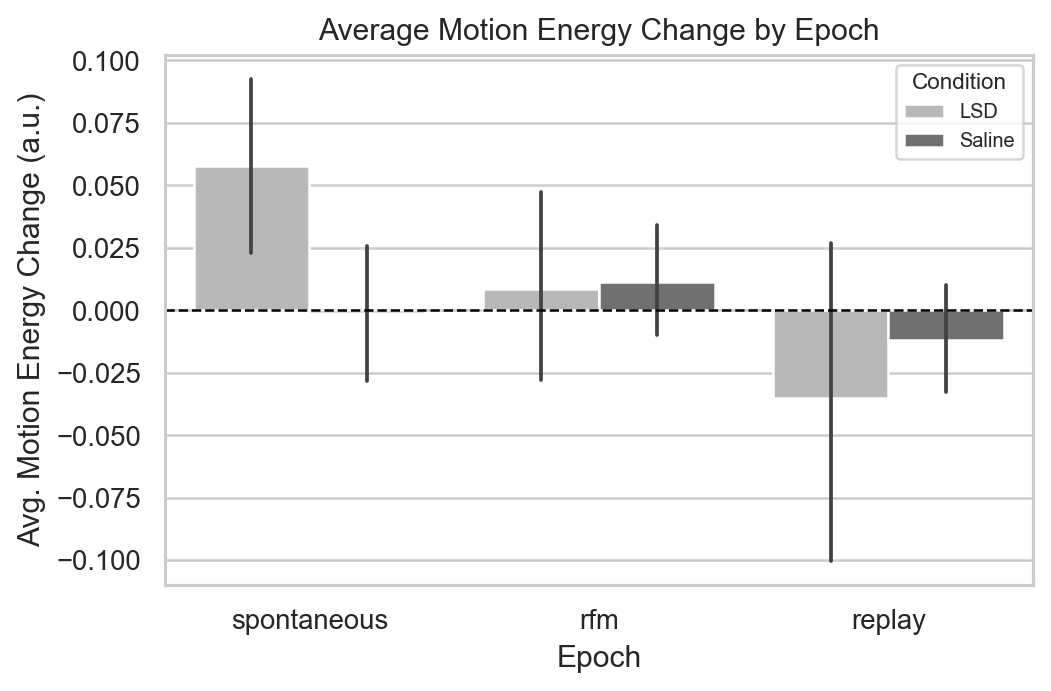

In [848]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set aesthetics
sns.set(style="whitegrid")

# Define palette (custom gray-blue)
gray_blue_palette = ['#b8b8b8', '#707070']

# Plot
plt.figure(figsize=(6, 4))
ax = sns.barplot(
    data=all_data_eid,
    x='epoch',
    y='avgmotion',
    hue='condition',
    palette=gray_blue_palette,
    ci=68,              # Use bootstrapped 68% CI to represent SEM-like bars
    errwidth=1.5,
    dodge=True
)

# Add zero line
plt.axhline(0, color='black', linewidth=1, linestyle='--')

# Tidy up labels and legend
ax.set_title('Average Motion Energy Change by Epoch', fontsize=12)
ax.set_ylabel('Avg. Motion Energy Change (a.u.)')
ax.set_xlabel('Epoch')
ax.legend(title="Condition", title_fontsize=9, fontsize=8)

# Optional tight layout
plt.tight_layout()
plt.show()


In [849]:
import pingouin as pg

aov = pg.mixed_anova(
    dv='avgmotion',
    within='epoch',
    between='condition',
    subject='eid',
    data=all_data_eid
)
print(aov)


        Source        SS  DF1  DF2        MS         F     p-unc  p-GG-corr  \
0    condition  0.002355    1   31  0.002355  0.039599  0.843566        NaN   
1        epoch  0.081805    2   62  0.040902  1.334218  0.270819   0.261792   
2  Interaction  0.023787    2   62  0.011893  0.387954  0.680079        NaN   

        np2       eps sphericity   W-spher   p-spher  
0  0.001276       NaN        NaN       NaN       NaN  
1  0.041263  0.747101      False  0.661493  0.001653  
2  0.012360       NaN        NaN       NaN       NaN  


In [831]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM

# Ensure categorical types
all_data_eid['eid'] = all_data_eid['eid'].astype(str)
all_data_eid['condition'] = all_data_eid['condition'].astype('category')
all_data_eid['epoch'] = all_data_eid['epoch'].astype('category')

import statsmodels.formula.api as smf

# Mixed-effects model: avgmotion ~ condition * epoch + (1|eid)
model = smf.mixedlm("avgmotion ~ condition * epoch", all_data_eid, groups=all_data_eid["eid"])
result = model.fit()
print(result.summary())


             Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   avgmotion
No. Observations:     99        Method:               REML     
No. Groups:           33        Scale:                0.0303   
Min. group size:      3         Log-Likelihood:       14.7400  
Max. group size:      3         Converged:            Yes      
Mean group size:      3.0                                      
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept            -0.004    0.064 -0.062 0.951 -0.130  0.122
epoch[T.replay]      -0.034    0.074 -0.458 0.647 -0.180  0.112
epoch[T.rfm]          0.013    0.069  0.193 0.847 -0.122  0.149
epoch[T.spontaneous]  0.046    0.069  0.661 0.509 -0.090  0.181
Group Var             0.009    0.034                           



c:\Users\marti\anaconda3\envs\iblenv\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [832]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Create a combined factor to test pairwise interaction differences
all_data_eid['group'] = all_data_eid['condition'].astype(str) + "_" + all_data_eid['epoch'].astype(str)

# Run Tukey HSD
tukey = pairwise_tukeyhsd(endog=all_data_eid['avgmotion'],
                          groups=all_data_eid['group'],
                          alpha=0.05)
print(tukey)


      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1        group2     meandiff p-adj   lower  upper  reject
----------------------------------------------------------------
   LSD_rep      LSD_replay  -0.0233 0.9906 -0.2268 0.1802  False
   LSD_rep         LSD_rfm   0.0211 0.9922 -0.1747 0.2169  False
   LSD_rep LSD_spontaneous   0.0534 0.8918 -0.1424 0.2492  False
LSD_replay         LSD_rfm   0.0444 0.8395 -0.0953 0.1841  False
LSD_replay LSD_spontaneous   0.0767 0.4805  -0.063 0.2164  False
   LSD_rfm LSD_spontaneous   0.0323 0.9122 -0.0959 0.1605  False
----------------------------------------------------------------


#### Plots

Must edit given the dataframe changes

In [ ]:
# must be re-done using averaged flattened av motion energies
md_spo_exp = experimental_diff['avgmotion'].values()
fig, axs = plt.subplots(ncols=3, figsize=(8, 2), constrained_layout=False)

#vmin_mot = min(avg_motion_pre.min(), avg_motion_post.min())
#vmin_mot = min(md_spo.min(), md_rfm.min(), md_rep.min())
vmax_mot = max(md_spo_exp.max(), md_rfm_exp.max(), md_rep_exp.max())
vmin_mot = -vmax_mot
print(vmax_mot)
# Plot motion energy maps
im0 = axs[0].imshow(md_spo_exp, cmap='bwr', vmin=vmin_mot, vmax=vmax_mot)
im1 = axs[1].imshow(md_rfm_exp, cmap='bwr', vmin=vmin_mot, vmax=vmax_mot)
im2 = axs[2].imshow(md_rep_exp, cmap='bwr', vmin=vmin_mot, vmax=vmax_mot)

# Style individual subplots
for ax, title in zip(axs, ["Spontaneous", "RFM", "Replay"]):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title, fontsize = 8)
    for spine in ax.spines.values():
        spine.set_visible(True)

# Add colorbar
cbar = fig.colorbar(im2, ax=axs, shrink=0.8, location='right')
cbar.set_label('Motion energy (a.u.)', fontsize = 8)

# Centered, clean figure title
fig.suptitle("Average Motion Energy Change Across Epochs (LSD group)", fontsize=10)


Text(0.5, 0.98, 'Average Motion Energy Change Across Epochs (Saline group)')

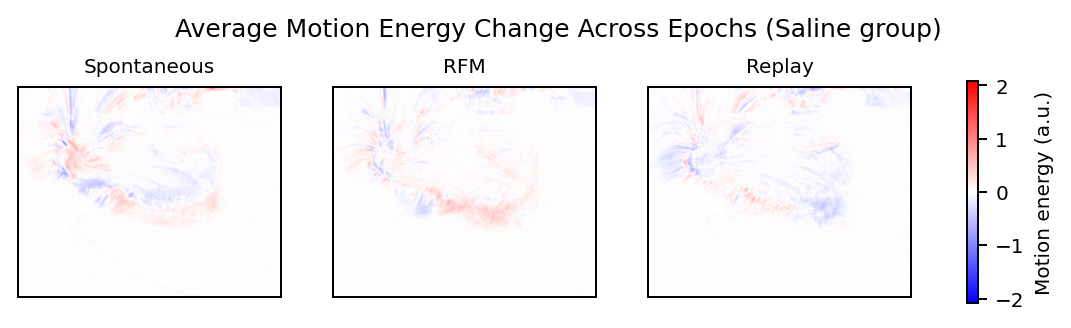

In [44]:
fig, axs = plt.subplots(ncols=3, figsize=(8, 2), constrained_layout=False)

#vmin_mot = min(avg_motion_pre.min(), avg_motion_post.min())
#vmin_mot = min(md_spo.min(), md_rfm.min(), md_rep.min())
vmax_mot =  2.0813947 #max(md_spo.max(), md_rfm.max(), md_rep.max())
vmin_mot = -vmax_mot #-vmax_mot
# Plot motion energy maps
im0 = axs[0].imshow(md_spo_cont, cmap='bwr', vmin=vmin_mot, vmax=vmax_mot)
im1 = axs[1].imshow(md_rfm_cont, cmap='bwr', vmin=vmin_mot, vmax=vmax_mot)
im2 = axs[2].imshow(md_rep_cont, cmap='bwr', vmin=vmin_mot, vmax=vmax_mot)

# Style individual subplots
for ax, title in zip(axs, ["Spontaneous", "RFM", "Replay"]):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title, fontsize = 8)
    for spine in ax.spines.values():
        spine.set_visible(True)

# Add colorbar
cbar = fig.colorbar(im2, ax=axs, shrink=0.8, location='right')
cbar.set_label('Motion energy (a.u.)', fontsize = 8)

# Centered, clean figure title
fig.suptitle("Average Motion Energy Change Across Epochs (Saline group)", fontsize=10)


## Explained Variance Plot

In [98]:
exp_pre = []
exp_post = []
for eid in cont_results['eid'].unique():

#eidx = exp_results['eid'].unique()[0]

#replay
    pre, post = load_pca_results(cont_results, eid, epoch_name='replay')

    pre_eigenmsk, _, pre_eigenval = get_eigen(pre)
    post_eigenmsk, _, post_eigenval = get_eigen(post)

    pre_explained_ratio = pre_eigenval/(pre_eigenval.sum())

    comp_pre = np.searchsorted(pre_explained_ratio.cumsum(), 0.8)+1
    exp_pre.append(comp_pre)

    print("First pre component explains: ", pre_explained_ratio[0])
    post_explained_ratio = post_eigenval/(post_eigenval.sum())

    comp_post = np.searchsorted(post_explained_ratio.cumsum(), 0.8)+1
    exp_post.append(comp_post)
    print("First postcomponent explains: ", post_explained_ratio[0])


Temporal PC matrix has shape (18780, 500)
Eigenmask matrix has shape  (81920, 500)
singular value array has shape  (500,)
Temporal PC matrix has shape (16744, 500)
Eigenmask matrix has shape  (81920, 500)
singular value array has shape  (500,)
First pre component explains:  0.19366126
First postcomponent explains:  0.18130246
Temporal PC matrix has shape (18720, 500)
Eigenmask matrix has shape  (81920, 500)
singular value array has shape  (500,)
Temporal PC matrix has shape (13837, 500)
Eigenmask matrix has shape  (81920, 500)
singular value array has shape  (500,)
First pre component explains:  0.24333078
First postcomponent explains:  0.21965095
Temporal PC matrix has shape (18720, 500)
Eigenmask matrix has shape  (81920, 500)
singular value array has shape  (500,)
Temporal PC matrix has shape (18780, 500)
Eigenmask matrix has shape  (81920, 500)
singular value array has shape  (500,)
First pre component explains:  0.22311313
First postcomponent explains:  0.2121737
Temporal PC matri

In [208]:
eid1 = exp_results['eid'].unique()[0]

pre, post = load_pca_results(cont_results, eid, epoch_name='replay')

_, _, pre_eigenval = get_eigen(pre)
_, _, post_eigenval = get_eigen(post)

pre_explained_ratio = pre_eigenval/(pre_eigenval.sum())

comp_pre = np.searchsorted(pre_explained_ratio.cumsum(), 0.7)+1
print("First pre component explains: ", pre_explained_ratio[0])
post_explained_ratio = post_eigenval/(post_eigenval.sum())

comp_post = np.searchsorted(post_explained_ratio.cumsum(), 0.7)+1


Temporal PC matrix has shape (18780, 500)
Eigenmask matrix has shape  (81920, 500)
singular value array has shape  (500,)
Temporal PC matrix has shape (18780, 500)
Eigenmask matrix has shape  (81920, 500)
singular value array has shape  (500,)
71
First pre component explains:  0.16053155
68


C:\Users\marti\AppData\Local\Temp\ipykernel_26124\1430186335.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.arange(len(pre_explained_ratio))) + 1, np.log(pre_explained_ratio), color = 'red')


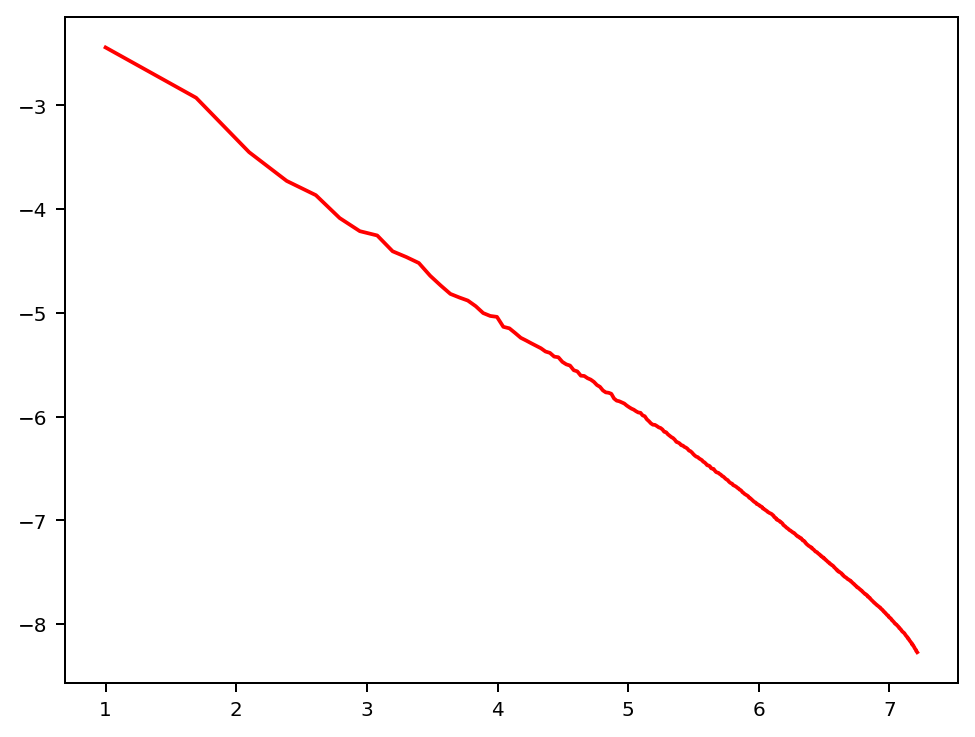

In [213]:
plt.plot(np.log(np.arange(len(pre_explained_ratio))) + 1, np.log(pre_explained_ratio), color = 'red')
#plt.plot(post_explained_ratio, color ='blue')

# y = x^a

## Cosine Similarity

### Plotting Matrix

In [1]:
# cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
from psyfun import util
k = 150 #<-- components to keep
similarity_matrix = cosine_similarity(pre_eigenmsk.T[:k,:], post_eigenmsk[:,:k].T)

NameError: name 'pre_eigenmsk' is not defined

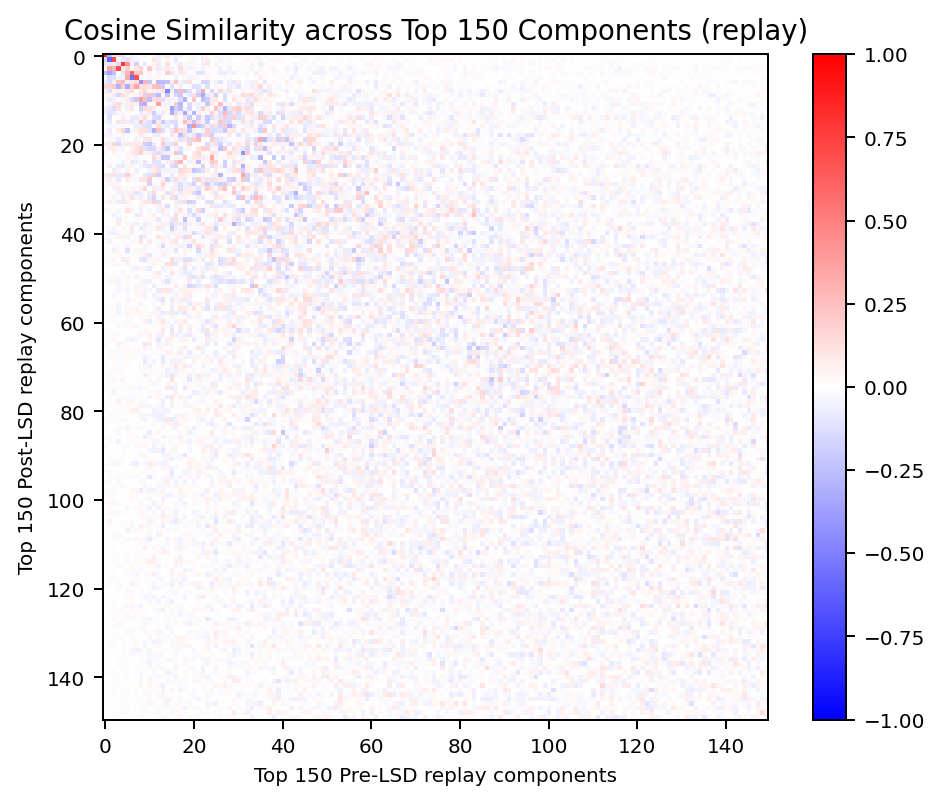

In [162]:
fig, ax0 = plt.subplots()
cax = ax0.imshow(similarity_matrix, cmap='bwr', vmin=-1, vmax=1)
ax0.set_title("Cosine Similarity across Top 150 Components (replay)")
ax0.set_xlabel("Top 150 Pre-LSD replay components")
ax0.set_ylabel("Top 150 Post-LSD replay components")
fig.colorbar(cax, ax=ax0)
plt.show()

### Analysis

#### Data

In [28]:
all_data_similarity = extract_measure(exp_results, cont_results, metric = 'similarity', n_comps=150)

Eigenmask matrix has shape  (81920, 500)
Temporal PC matrix has shape (18000, 500)
singular value array has shape  (500,)
Eigenmask matrix has shape  (81920, 500)
Temporal PC matrix has shape (18000, 500)
singular value array has shape  (500,)
Eigenmask matrix has shape  (81920, 500)
Temporal PC matrix has shape (22200, 500)
singular value array has shape  (500,)
Eigenmask matrix has shape  (81920, 500)
Temporal PC matrix has shape (22080, 500)
singular value array has shape  (500,)
Eigenmask matrix has shape  (81920, 500)
Temporal PC matrix has shape (18120, 500)
singular value array has shape  (500,)
Eigenmask matrix has shape  (81920, 500)
Temporal PC matrix has shape (18120, 500)
singular value array has shape  (500,)
Eigenmask matrix has shape  (81920, 500)
Temporal PC matrix has shape (18000, 500)
singular value array has shape  (500,)
Eigenmask matrix has shape  (81920, 500)
Temporal PC matrix has shape (18000, 500)
singular value array has shape  (500,)
Eigenmask matrix has sha

In [29]:
anova = pg.mixed_anova(
                        dv = 'avg_sim',
                        within ='epoch',
                        between = 'condition',
                        subject = 'eid',
                        data = all_data_similarity)

print(anova)


        Source        SS  DF1  DF2        MS         F     p-unc       np2  \
0    condition  0.242508    1   31  0.242508  8.832217  0.005678  0.221736   
1        epoch  0.062531    2   62  0.031265  2.501807  0.090177  0.074677   
2  Interaction  0.001413    2   62  0.000706  0.056517  0.945099  0.001820   

        eps  
0       NaN  
1  0.878195  
2       NaN  


C:\Users\marti\AppData\Local\Temp\ipykernel_3756\1567086437.py:7: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  ax1 = sns.stripplot(data=all_data_similarity, x='epoch', y='avg_sim', hue = 'condition', color='black', size=2, jitter=False, dodge=True, ax=ax, legend=None)


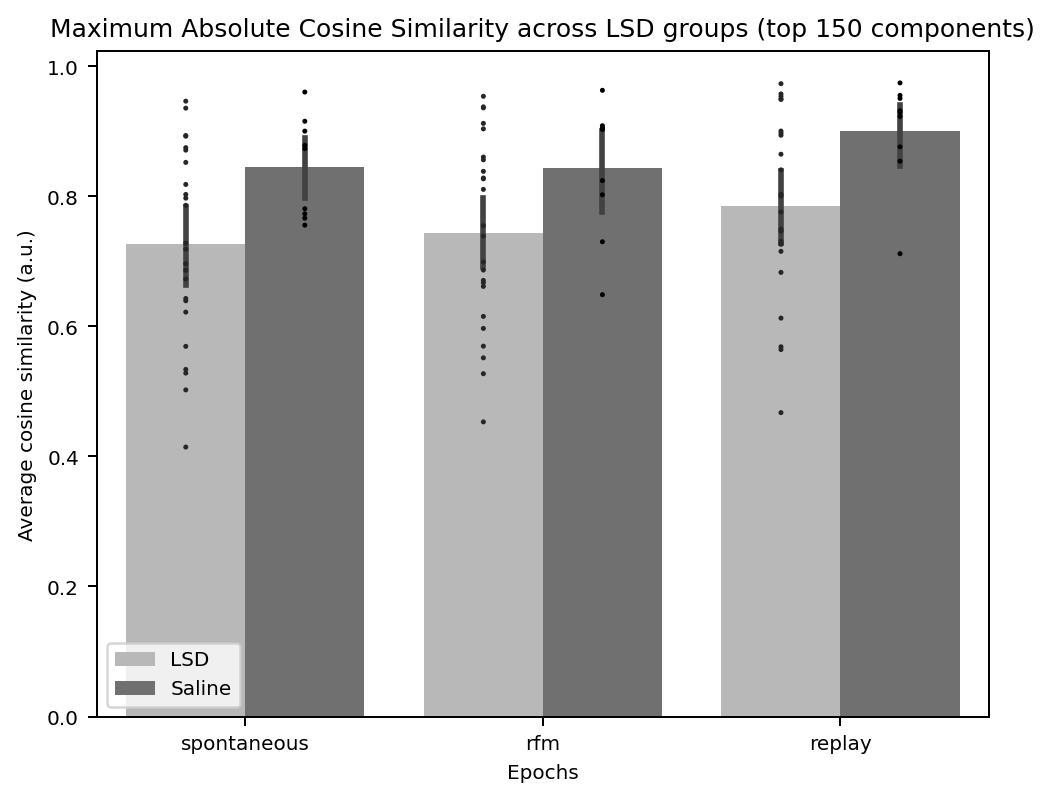

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

gray_blue_palette = ['#b8b8b8', '#707070']  # light and dark gray-blue

ax = sns.barplot(data=all_data_similarity, x='epoch', y='avg_sim', hue='condition', palette=gray_blue_palette)
ax1 = sns.stripplot(data=all_data_similarity, x='epoch', y='avg_sim', hue = 'condition', color='black', size=2, jitter=False, dodge=True, ax=ax, legend=None)

ax.legend(title = "Condition", title_fontsize = 8, fontsize = 8)
ax1.legend()
plt.title('Maximum Absolute Cosine Similarity across LSD groups (top 150 components)', fontsize = 10)
plt.ylabel('Average cosine similarity (a.u.)')
plt.xlabel("Epochs")
plt.show()


In [15]:
## experimental case
experimental = []
from sklearn.metrics.pairwise import cosine_similarity
from psyfun import util

k = 20 # <-- components to keep

for eid in exp_results['eid'].unique():
    for epoch in ['spontaneous', 'rfm', 'replay']:
        #eidx = exp_results['eid'].unique()[0]

        pre, post = load_pca_results(exp_results, eid, epoch_name=epoch)

        pre_eigenmsk, _, pre_eigenval = get_eigen(pre)
        post_eigenmsk, _, post_eigenval = get_eigen(post)

        # cosine similarity

        similarity_matrix = cosine_similarity(pre_eigenmsk.T[:k,:], post_eigenmsk[:,:k].T)
        
        # rowmax list
        max_similarity = np.max(similarity_matrix)

        # average value
        experimental.append((eid, epoch, np.mean(max_similarity)))



## control case
control = []
from sklearn.metrics.pairwise import cosine_similarity
from psyfun import util

for eid in cont_results['eid'].unique():
    for epoch in ['spontaneous', 'rfm', 'replay']:
        pre, post = load_pca_results(cont_results, eid, epoch_name=epoch)

        pre_eigenmsk, _, pre_eigenval = get_eigen(pre)
        post_eigenmsk, _, post_eigenval = get_eigen(post)

        # cosine similarity

        similarity_matrix = cosine_similarity(pre_eigenmsk.T[:k,:], post_eigenmsk[:,:k].T)
        
        # rowmax list
        max_similarity = np.max(similarity_matrix)

        # average value
        control.append((eid, epoch, np.mean(max_similarity)))   

Eigenmask matrix has shape  (81920, 500)
Temporal PC matrix has shape (18000, 500)
singular value array has shape  (500,)
Eigenmask matrix has shape  (81920, 500)
Temporal PC matrix has shape (18000, 500)
singular value array has shape  (500,)
Eigenmask matrix has shape  (81920, 500)
Temporal PC matrix has shape (22200, 500)
singular value array has shape  (500,)
Eigenmask matrix has shape  (81920, 500)
Temporal PC matrix has shape (22080, 500)
singular value array has shape  (500,)
Eigenmask matrix has shape  (81920, 500)
Temporal PC matrix has shape (18120, 500)
singular value array has shape  (500,)
Eigenmask matrix has shape  (81920, 500)
Temporal PC matrix has shape (18120, 500)
singular value array has shape  (500,)
Eigenmask matrix has shape  (81920, 500)
Temporal PC matrix has shape (18000, 500)
singular value array has shape  (500,)
Eigenmask matrix has shape  (81920, 500)
Temporal PC matrix has shape (18000, 500)
singular value array has shape  (500,)
Eigenmask matrix has sha

In [16]:
# replay cosine similarity comparison

exp_data = pd.DataFrame(experimental, columns = ['eid', 'epoch', 'avg_sim'])
control_data = pd.DataFrame(control, columns = ['eid', 'epoch', 'avg_sim'])


#### tests

In [17]:
from scipy import stats
import seaborn as sns
exp_val = exp_data['avg_sim'][exp_data['epoch'] == 'spontaneous']
control_val= control_data['avg_sim'][control_data['epoch'] == 'spontaneous']

ttest = stats.ttest_ind(exp_val, control_val, equal_var=False)
print(ttest)

# t = 0.67, p = 0.51
exp_val = exp_data['avg_sim'][exp_data['epoch'] == 'rfm']
control_val= control_data['avg_sim'][control_data['epoch'] == 'rfm']

ttest = stats.ttest_ind(exp_val, control_val, equal_var=False)
print(ttest)

#t = 1.29, p=  0.21

exp_val = exp_data['avg_sim'][exp_data['epoch'] == 'replay']
control_val= control_data['avg_sim'][control_data['epoch'] == 'replay']

ttest = stats.ttest_ind(exp_val, control_val, equal_var=False)
print(ttest)
# t = -0.21, p = 0.83


TtestResult(statistic=-2.999567598967745, pvalue=0.0056795216667603985, df=27.552675544205407)
TtestResult(statistic=-2.2184691703707946, pvalue=0.03772544164888143, df=20.914806042305898)
TtestResult(statistic=-2.9434996182610735, pvalue=0.006881206877950423, df=25.18635830684063)


In [18]:
from scipy import stats
import pingouin as pg

exp_data['condition'] = 'LSD'
control_data['condition'] = 'Saline'

all_data = pd.concat([exp_data, control_data], ignore_index=True)

anova = pg.mixed_anova(
                        dv = 'avg_sim',
                        within ='epoch',
                        between = 'condition',
                        subject = 'eid',
                        data = all_data)

print(anova)



        Source        SS  DF1  DF2        MS         F     p-unc       np2  \
0    condition  0.243735    1   31  0.243735  8.802369  0.005751  0.221152   
1        epoch  0.062986    2   62  0.031493  2.522834  0.088440  0.075257   
2  Interaction  0.001285    2   62  0.000643  0.051480  0.949863  0.001658   

        eps  
0       NaN  
1  0.877829  
2       NaN  


C:\Users\marti\AppData\Local\Temp\ipykernel_3756\1480514318.py:7: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  ax1 = sns.stripplot(data=all_data, x='epoch', y='avg_sim', hue = 'condition', color='black', size=2, jitter=False, dodge=True, ax=ax, legend=None)


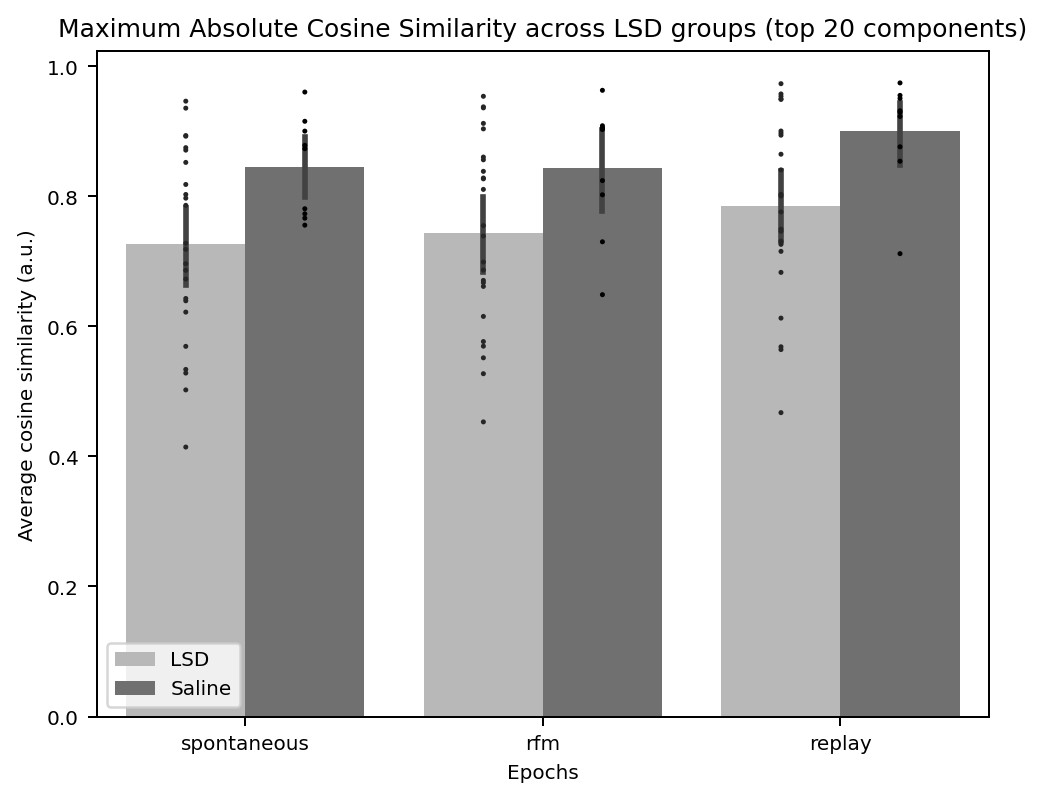

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

gray_blue_palette = ['#b8b8b8', '#707070']  # light and dark gray-blue

ax = sns.barplot(data=all_data, x='epoch', y='avg_sim', hue='condition', palette=gray_blue_palette)
ax1 = sns.stripplot(data=all_data, x='epoch', y='avg_sim', hue = 'condition', color='black', size=2, jitter=False, dodge=True, ax=ax, legend=None)

ax.legend(title = "Condition", title_fontsize = 8, fontsize = 8)
ax1.legend()
plt.title('Maximum Absolute Cosine Similarity across LSD groups (top 20 components)', fontsize = 10)
plt.ylabel('Average cosine similarity (a.u.)')
plt.xlabel("Epochs")
plt.show()


post hoc

In [21]:
posthoc = pg.pairwise_tests(dv='avg_sim', within='epoch', subject='eid', parametric=False, data=exp_data, padjust='none')
print(posthoc)

  Contrast       A            B  Paired  Parametric  W-val alternative  \
0    epoch  replay          rfm    True       False  104.0   two-sided   
1    epoch  replay  spontaneous    True       False   86.0   two-sided   
2    epoch     rfm  spontaneous    True       False  122.0   two-sided   

      p-unc    hedges  
0  0.197378  0.291004  
1  0.069102  0.405519  
2  0.438931  0.114389  


In [22]:
posthoc = pg.pairwise_tests(dv='avg_sim', within='epoch', subject='eid', parametric=True, data=control_data, padjust='none')
print(posthoc)

  Contrast       A            B  Paired  Parametric         T  dof  \
0    epoch  replay          rfm    True        True  1.747194  8.0   
1    epoch  replay  spontaneous    True        True  1.403317  8.0   
2    epoch     rfm  spontaneous    True        True -0.044288  8.0   

  alternative     p-unc   BF10    hedges  
0   two-sided  0.118739   0.97  0.596781  
1   two-sided  0.198124  0.683  0.678304  
2   two-sided  0.965761  0.322 -0.016320  


significant analysis here depends on how these "change" metrics compare to the control case. That way, I could claim some sort of significant behavioral change upon LSD administration

possible next steps:
- subplane similarity analysis. take top k (argmax) components from individual pair cos analysis and compare the basis. This could give a more nuanced comparison in behavioral change, but I'm afraid the angle intuition necessarily get lost.
- the fact that it's two different motif basis is getting on my nerves. Lempel-ziv


same thing but with 3 

Temporal PC matrix has shape (18000, 500)
Eigenmask matrix has shape  (81920, 500)
singular value array has shape  (500,)
Temporal PC matrix has shape (18000, 500)
Eigenmask matrix has shape  (81920, 500)
singular value array has shape  (500,)
Temporal PC matrix has shape (23040, 500)
Eigenmask matrix has shape  (81920, 500)
singular value array has shape  (500,)
Temporal PC matrix has shape (24180, 500)
Eigenmask matrix has shape  (81920, 500)
singular value array has shape  (500,)
Temporal PC matrix has shape (18720, 500)
Eigenmask matrix has shape  (81920, 500)
singular value array has shape  (500,)
Temporal PC matrix has shape (17920, 500)
Eigenmask matrix has shape  (81920, 500)
singular value array has shape  (500,)
Temporal PC matrix has shape (18000, 500)
Eigenmask matrix has shape  (81920, 500)
singular value array has shape  (500,)
Temporal PC matrix has shape (18000, 500)
Eigenmask matrix has shape  (81920, 500)
singular value array has shape  (500,)
Temporal PC matrix has s

C:\Users\marti\AppData\Local\Temp\ipykernel_26124\3887960789.py:79: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  ax1 = sns.stripplot(data=all_data, x='epoch', y='avg_sim', hue = 'condition', color='black', size=2, jitter=False, dodge=True, ax=ax, legend=None)


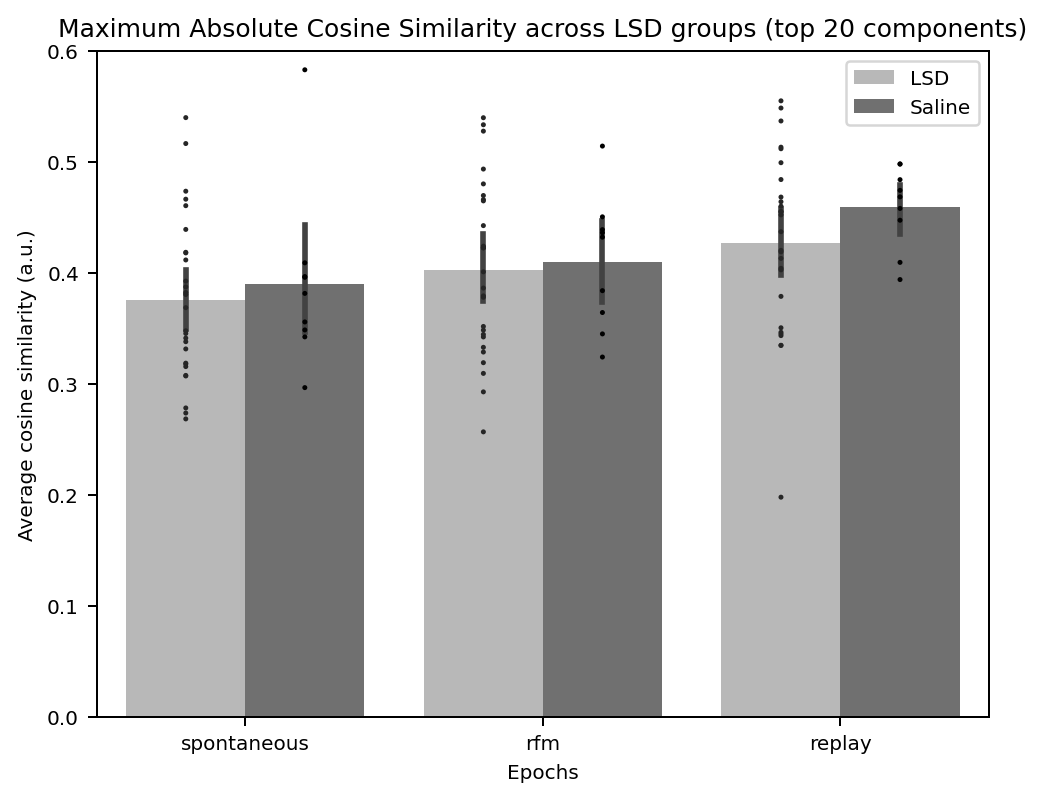

In [205]:
## experimental case
from scipy import stats
import pingouin as pg
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

k = 20 # <-- components to keep

experimental = []
for eid in exp_results['eid'].unique():
    for epoch in ['spontaneous', 'rfm', 'replay']:
        #eidx = exp_results['eid'].unique()[0]

        pre, post = load_pca_results(exp_results, eid, epoch_name=epoch)

        pre_eigenmsk, _, pre_eigenval = get_eigen(pre)
        post_eigenmsk, _, post_eigenval = get_eigen(post)

        # cosine similarity

        similarity_matrix = cosine_similarity(pre_eigenmsk.T[:k,:], post_eigenmsk[:,:k].T)
        
        # rowmax list
        max_similarity = np.max(np.abs(similarity_matrix), axis = 0)

        # average value
        experimental.append((eid, epoch, np.mean(max_similarity)))



## control case

control = []
for eid in cont_results['eid'].unique():
    for epoch in ['spontaneous', 'rfm', 'replay']:
        pre, post = load_pca_results(cont_results, eid, epoch_name=epoch)

        pre_eigenmsk, _, pre_eigenval = get_eigen(pre)
        post_eigenmsk, _, post_eigenval = get_eigen(post)

        # cosine similarity
        similarity_matrix = cosine_similarity(pre_eigenmsk.T[:k,:], post_eigenmsk[:,:k].T)
        
        # rowmax list
        max_similarity = np.max(np.abs(similarity_matrix), axis = 0)

        # average value
        control.append((eid, epoch, np.mean(max_similarity)))   



#  dataframe
exp_data = pd.DataFrame(experimental, columns = ['eid', 'epoch', 'avg_sim'])
control_data = pd.DataFrame(control, columns = ['eid', 'epoch', 'avg_sim'])

# MIXED ANOVA


exp_data['condition'] = 'LSD'
control_data['condition'] = 'Saline'

all_data = pd.concat([exp_data, control_data], ignore_index=True)

anova = pg.mixed_anova(
                        dv = 'avg_sim',
                        within ='epoch',
                        between = 'condition',
                        subject = 'eid',
                        data = all_data)

print(anova)



gray_blue_palette = ['#b8b8b8', '#707070']  # light and dark gray-blue

ax = sns.barplot(data=all_data, x='epoch', y='avg_sim', hue='condition', palette=gray_blue_palette)
ax1 = sns.stripplot(data=all_data, x='epoch', y='avg_sim', hue = 'condition', color='black', size=2, jitter=False, dodge=True, ax=ax, legend=None)

ax.legend(title = "Condition", title_fontsize = 8, fontsize = 8)
ax1.legend()
plt.title(f'Maximum Absolute Cosine Similarity across LSD groups (top {k} components)', fontsize = 10)
plt.ylabel('Average cosine similarity (a.u.)')
plt.xlabel("Epochs")
plt.ylim(0, 0.6)
plt.show()

In [183]:
exp_data['condition'] = 'LSD'
control_data['condition'] = 'Saline'

all_data = pd.concat([exp_data, control_data], ignore_index=True)

anova = pg.mixed_anova(
                        dv = 'similarity',
                        within ='epoch',
                        between = 'condition',
                        subject = 'eid',
                        data = all_data)

print(anova)



gray_blue_palette = ['#b8b8b8', '#707070']  # light and dark gray-blue
ax = sns.barplot(data=all_data, x='epoch', y='avg_sim', hue='condition', palette=LSD_CONT_palette)

ax1 = sns.stripplot(data=all_data, x='epoch', y='avg_sim', hue = 'condition', color='black', size=2, jitter=False, dodge=True, ax=ax, legend=None)

ax.legend(title = "Condition", title_fontsize = 8, fontsize = 8)
ax1.legend()
plt.title(f'Maximum Absolute Cosine Similarity across LSD groups (top {k} components)', fontsize = 10)
plt.ylabel('Average cosine similarity (a.u.)')
plt.xlabel("Epochs")
plt.ylim(0, 0.7)
plt.show()

KeyError: 'avg_sim'

## Power Law Slope

### Data: slope change

In [48]:
## experimental case
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt
from psyfun import util

k = 150 # <-- components to keep

experimental = []
for eid in exp_results['eid'].unique():
    for epoch in ['spontaneous', 'rfm', 'replay']:
        #eidx = exp_results['eid'].unique()[0]

        pre, post = load_pca_results(exp_results, eid, epoch_name=epoch)

        _, _, pre_eigenval = get_eigen(pre)
        _, _, post_eigenval = get_eigen(post)

        # power law
        
        slope_pre = util.power_law_slope(pre_eigenval, k)
        slope_post = util. power_law_slope(post_eigenval, k)

        #experimental.append((eid, epoch, slope_pre, 'pre'))
        #experimental.append((eid, epoch, slope_post, 'post'))
        experimental.append((eid, epoch, slope_post - slope_pre))
        

## control case

control = []
for eid in cont_results['eid'].unique():
    for epoch in ['spontaneous', 'rfm', 'replay']:
        pre, post = load_pca_results(cont_results, eid, epoch_name=epoch)

        _, _, pre_eigenval = get_eigen(pre)
        _, _, post_eigenval = get_eigen(post)

        slope_pre = util.power_law_slope(pre_eigenval, k)
        slope_post = util. power_law_slope(post_eigenval, k)

        #control.append((eid, epoch, slope_pre, 'pre'))
        #control.append((eid, epoch, slope_post, 'post')) 
        control.append((eid, epoch, slope_post - slope_pre))



#  dataframe
#exp_data = pd.DataFrame(experimental, columns = ['eid', 'epoch', 'pow_law', 'time'])
# control_data = pd.DataFrame(control, columns = ['eid', 'epoch', 'pow_law', 'time'])
exp_data = pd.DataFrame(experimental, columns = ['eid', 'epoch', 'pow_law'])
control_data = pd.DataFrame(control, columns = ['eid', 'epoch', 'pow_law'])

# MIXED ANOVA

exp_data['condition'] = 'LSD'
control_data['condition'] = 'Saline'

all_data = pd.concat([exp_data, control_data], ignore_index=True)

Eigenmask matrix has shape  (81920, 500)
Temporal PC matrix has shape (18000, 500)
singular value array has shape  (500,)
Eigenmask matrix has shape  (81920, 500)
Temporal PC matrix has shape (18000, 500)
singular value array has shape  (500,)
Eigenmask matrix has shape  (81920, 500)
Temporal PC matrix has shape (23040, 500)
singular value array has shape  (500,)
Eigenmask matrix has shape  (81920, 500)
Temporal PC matrix has shape (24180, 500)
singular value array has shape  (500,)
Eigenmask matrix has shape  (81920, 500)
Temporal PC matrix has shape (18720, 500)
singular value array has shape  (500,)
Eigenmask matrix has shape  (81920, 500)
Temporal PC matrix has shape (17920, 500)
singular value array has shape  (500,)
Eigenmask matrix has shape  (81920, 500)
Temporal PC matrix has shape (18000, 500)
singular value array has shape  (500,)
Eigenmask matrix has shape  (81920, 500)
Temporal PC matrix has shape (18000, 500)
singular value array has shape  (500,)
Eigenmask matrix has sha

In [55]:
all_data['condition'] = all_data['condition'].astype('category')
all_data['epoch'] = all_data['epoch'].astype('category')
all_data['epoch'] = pd.Categorical(all_data['epoch'], categories=['spontaneous', 'rfm', 'replay'], ordered=True)
#all_data['time'] = all_data['time'].astype('category')

#setting order
#all_data['time'] = pd.Categorical(all_data['time'], categories=['pre', 'post'], ordered=True)

In [56]:
spo_df = all_data.query("epoch == 'spontaneous'")
rfm_df = all_data.query("epoch == 'rfm'")
replay_df = all_data.query("epoch == 'replay'")

### tests

#### penguin approach -- one within factor

        Source        SS  DF1  DF2        MS          F     p-unc       np2  \
0    condition  0.029540    1   34  0.029540  17.508541  0.000190  0.339915   
1        epoch  0.008524    2   68  0.004262   4.526055  0.014277  0.117480   
2  Interaction  0.002090    2   68  0.001045   1.109941  0.335475  0.031613   

        eps  
0       NaN  
1  0.985396  
2       NaN  


C:\Users\marti\AppData\Local\Temp\ipykernel_19660\2424697779.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(data=all_data, x='epoch', y='pow_law', hue='condition', palette=gray_blue_palette, ci = 95, errwidth=0, dodge = True)
C:\Users\marti\AppData\Local\Temp\ipykernel_19660\2424697779.py:16: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  ax = sns.barplot(data=all_data, x='epoch', y='pow_law', hue='condition', palette=gray_blue_palette, ci = 95, errwidth=0, dodge = True)
C:\Users\marti\AppData\Local\Temp\ipykernel_19660\2424697779.py:17: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  ax1 = sns.stripplot(data=all_data, x='epoch', y='pow_law', hue = 'condition', color='black', size=2, alpha = 0.7, jitter=True, dodge=True,

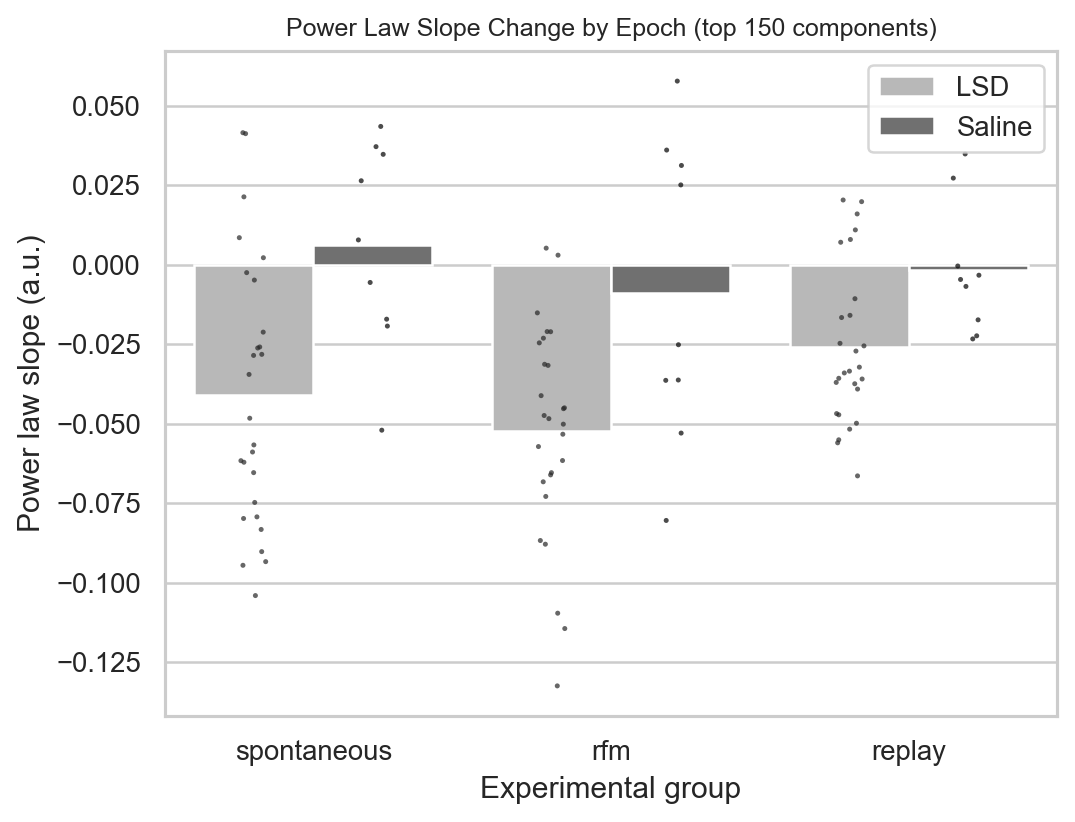

In [ ]:
epoch_df = rfm_df # <-- target epoch

anova = pg.mixed_anova(
                        dv = 'pow_law',
                        within = 'epoch', # change back to 'time'
                        between = 'condition',
                        subject = 'eid',
                        data = all_data)

print(anova)



gray_blue_palette = ['#b8b8b8', '#707070']  # light and dark gray-blue

ax = sns.barplot(data=all_data, x='epoch', y='pow_law', hue='condition', palette=gray_blue_palette, ci = 95, errwidth=0, dodge = True)
ax1 = sns.stripplot(data=all_data, x='epoch', y='pow_law', hue = 'condition', color='black', size=2, alpha = 0.7, jitter=True, dodge=True, ax=ax, legend=None)

ax.legend(title = "Administration", title_fontsize = 8, fontsize = 8)
ax1.legend()
plt.title(f'Power Law Slope Change by Epoch (top {k} components)', fontsize = 10)

plt.ylabel('Power law slope (a.u.)')
plt.xlabel("Experimental group")
plt.show()

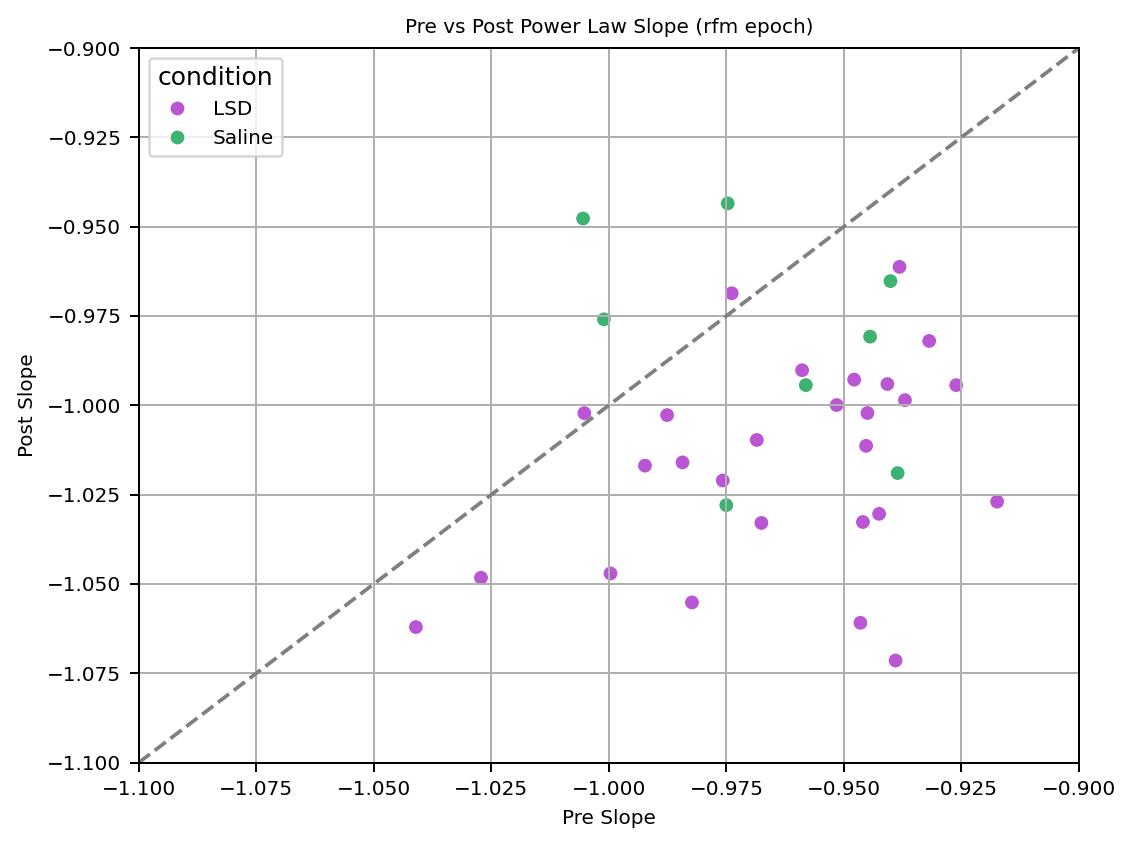

In [22]:
epoch_df_pv = epoch_df.pivot(index=['eid', 'condition', 'epoch'], columns='time', values='pow_law').reset_index()
epoch_df_pv.columns.name = None  



sns.scatterplot(data = epoch_df_pv, x = 'pre', y = 'post', hue = 'condition', palette = LSD_CONT_palette)
plt.plot([-1.1, 0.9], [-1.1, 0.9], linestyle='--', color='gray')

plt.xlabel("Pre Slope")
plt.ylabel("Post Slope")
plt.title("Pre vs Post Power Law Slope (rfm epoch)")
plt.grid(True)
plt.ylim(-1.1, -0.9)
plt.xlim(-1.1, -0.9)
plt.tight_layout()
plt.show()



  Contrast    A     B  Paired  Parametric  W-val alternative         p-unc  \
0     time  pre  post    True       False    3.0   two-sided  7.450581e-08   

     hedges  
0  1.731393  
  Contrast    A     B  Paired  Parametric  W-val alternative     p-unc  \
0     time  pre  post    True       False   16.0   two-sided  0.496094   

     hedges  
0  0.248526  


C:\Users\marti\AppData\Local\Temp\ipykernel_19660\1538007389.py:13: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  ax1 = sns.stripplot(data=epoch_df, x='condition', y='pow_law', hue = 'time', color='black', size=2, jitter=False, dodge=True, ax=ax, legend=None)


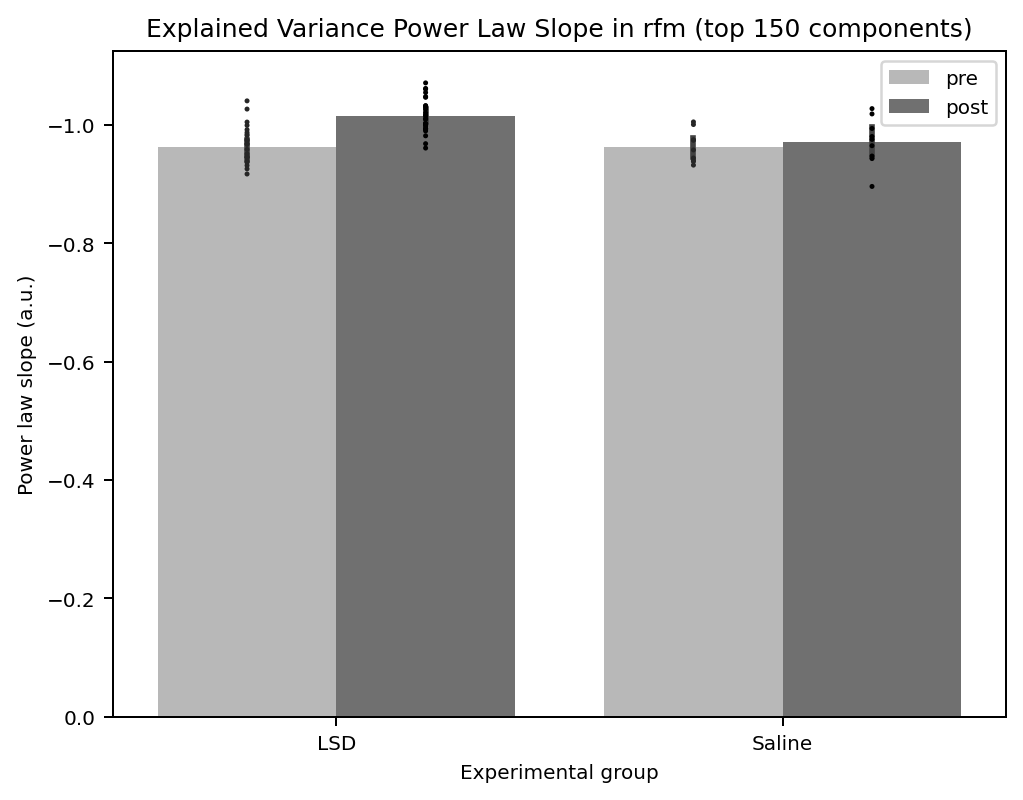

In [23]:
# Pre vs Post slopes within LSD group
lsd = pg.pairwise_tests(dv='pow_law', within='time', between=None, 
                   subject='eid', data=epoch_df[epoch_df['condition'] == 'LSD'], parametric=False)
                   
# Pre vs Post slopes within Control group
control = pg.pairwise_tests(dv='pow_law', within='time', between=None, 
                   subject='eid', data=epoch_df[epoch_df['condition'] == 'Saline'], parametric= False)

print(lsd)
print(control)

ax = sns.barplot(data=epoch_df, x='condition', y='pow_law', hue='time', palette=gray_blue_palette)
ax1 = sns.stripplot(data=epoch_df, x='condition', y='pow_law', hue = 'time', color='black', size=2, jitter=False, dodge=True, ax=ax, legend=None)

ax.invert_yaxis()

ax.legend(title = "Administration", title_fontsize = 8, fontsize = 8)
ax1.legend()
plt.title(f'Explained Variance Power Law Slope in rfm (top {k} components)', fontsize = 10)
plt.ylabel('Power law slope (a.u.)')
plt.xlabel("Experimental group")
plt.show()

#### statsmodel approach

In [47]:
import statsmodels.formula.api as smf
import statsmodels

model = smf.mixedlm(
            formula= "pow_law ~ time * epoch * condition",
            data = all_data,
            groups = 'eid')

result = model.fit()

print(result.summary())

                              Mixed Linear Model Regression Results
Model:                            MixedLM               Dependent Variable:               pow_law 
No. Observations:                 216                   Method:                           REML    
No. Groups:                       36                    Scale:                            0.0006  
Min. group size:                  6                     Log-Likelihood:                   431.4208
Max. group size:                  6                     Converged:                        Yes     
Mean group size:                  6.0                                                             
--------------------------------------------------------------------------------------------------
                                                      Coef.  Std.Err.    z     P>|z| [0.025 0.975]
--------------------------------------------------------------------------------------------------
Intercept                                

c:\Users\marti\anaconda3\envs\iblenv\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [33]:
import itertools
import pandas as pd

# All combinations of the fixed factors
factors = list(itertools.product(
    all_data['time'].unique(),
    all_data['epoch'].unique(),
    all_data['condition'].unique()
))

predict_df = pd.DataFrame(factors, columns=['time', 'epoch', 'condition'])

# Add dummy subject (since 'groups' is required)
predict_df['eid'] = all_data['eid'].iloc[0]




,time,epoch,condition,eid
0,pre,spontaneous,LSD,58ca39c5-e27f-43c4-8516-2ccc4fe88042
1,pre,spontaneous,Saline,58ca39c5-e27f-43c4-8516-2ccc4fe88042
2,pre,rfm,LSD,58ca39c5-e27f-43c4-8516-2ccc4fe88042
3,pre,rfm,Saline,58ca39c5-e27f-43c4-8516-2ccc4fe88042
4,pre,replay,LSD,58ca39c5-e27f-43c4-8516-2ccc4fe88042
5,pre,replay,Saline,58ca39c5-e27f-43c4-8516-2ccc4fe88042
6,post,spontaneous,LSD,58ca39c5-e27f-43c4-8516-2ccc4fe88042
7,post,spontaneous,Saline,58ca39c5-e27f-43c4-8516-2ccc4fe88042
8,post,rfm,LSD,58ca39c5-e27f-43c4-8516-2ccc4fe88042
9,post,rfm,Saline,58ca39c5-e27f-43c4-8516-2ccc4fe88042


In [35]:
predict_df['predicted'] = result.predict(predict_df)


In [36]:
predict_df['predicted_full'] = result.predict(exog=predict_df)


C:\Users\marti\AppData\Local\Temp\ipykernel_19660\4279051136.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.pointplot(


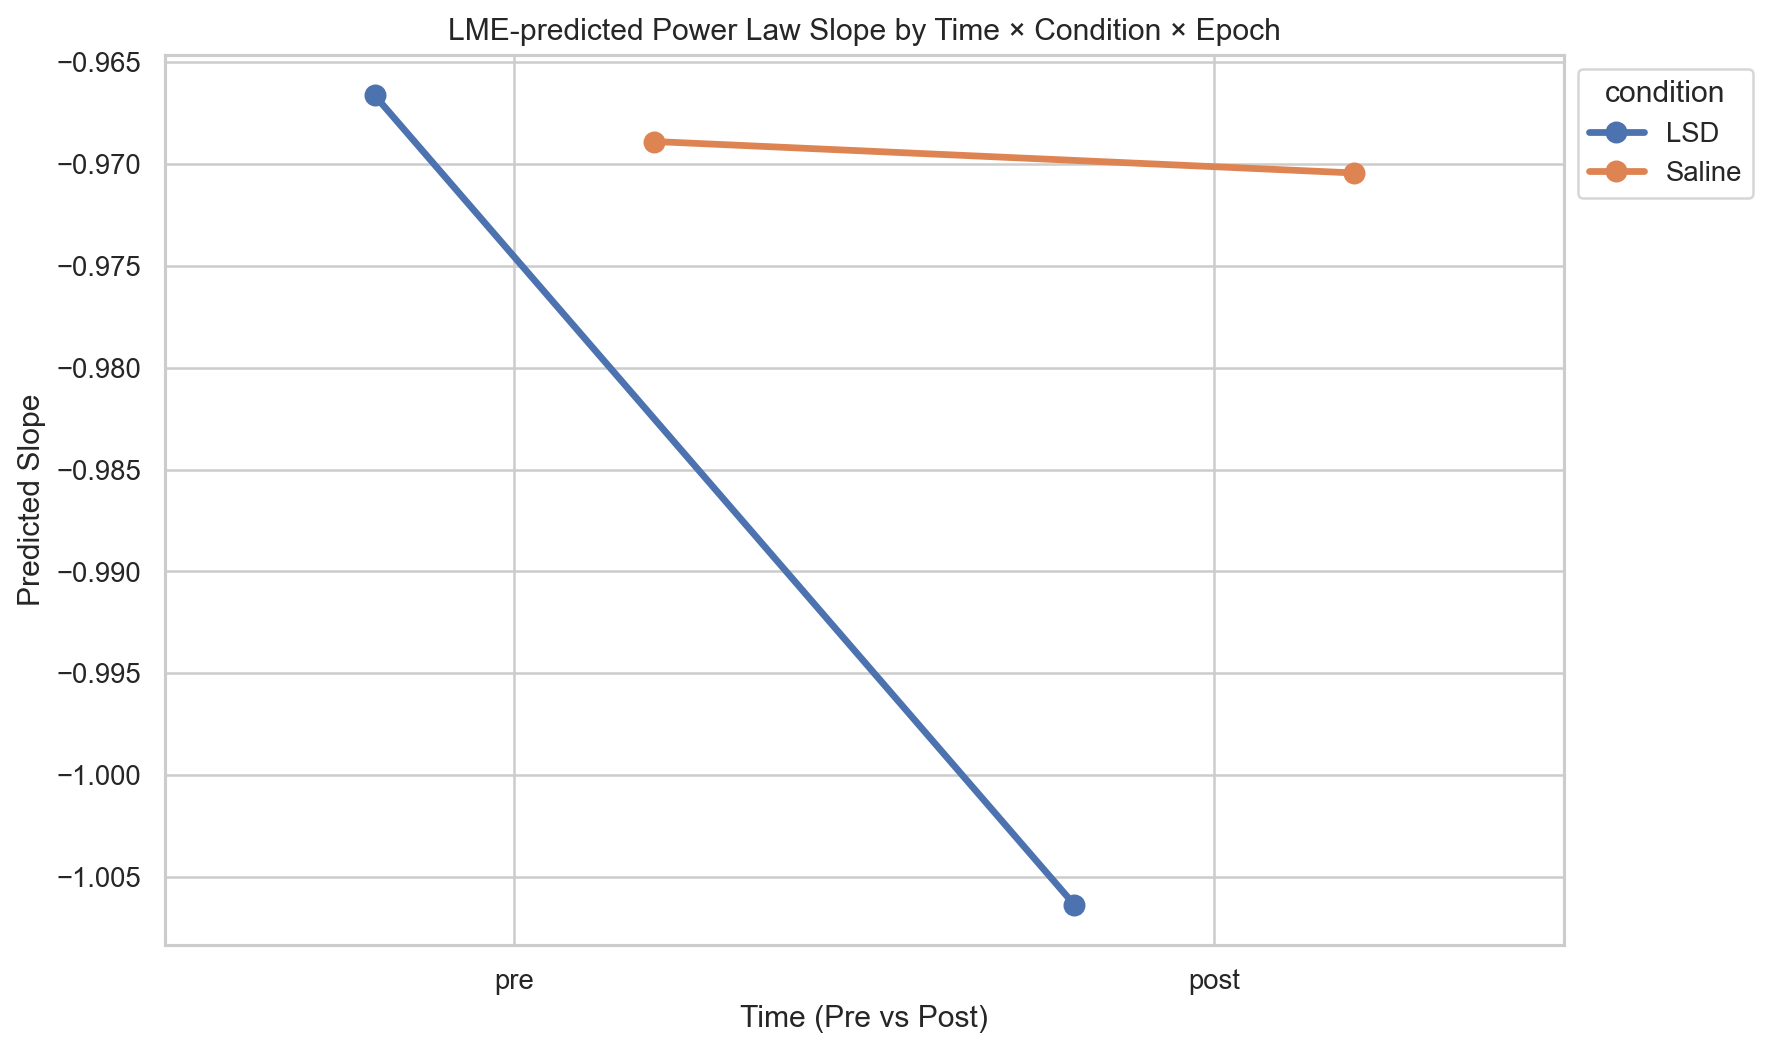

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.pointplot(
    data=predict_df,
    x='time', y='predicted',
    hue='condition',
    dodge=0.4,
    ci=None,
    markers='o',
    linestyles='-',
    palette='deep'
)

# Add separate lines for each epoch
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.title("LME-predicted Power Law Slope by Time × Condition × Epoch")
plt.ylabel("Predicted Slope")
plt.xlabel("Time (Pre vs Post)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [184]:

gray_blue_palette = ['#b8b8b8', '#707070']  # light and dark gray-blue

ax = sns.barplot(data=epoch_df, x='condition', y='pow_law', hue='time', palette=gray_blue_palette)
ax1 = sns.stripplot(data=epoch_df, x='condition', y='pow_law', hue = 'time', color='black', size=2, jitter=False, dodge=True, ax=ax, legend=None)

ax.legend(title = "Administration", title_fontsize = 8, fontsize = 8)
ax1.legend()
ax.invert_yaxis()
plt.title(f'Explained Variance Power Law Slope (top {k} components; replay. epoch)', fontsize = 10)

plt.ylabel('Power law slope (a.u.)')
plt.xlabel("Experimental group")
plt.show()

ValueError: Could not interpret value `pow_law` for `y`. An entry with this name does not appear in `data`.

## Lempel-Ziv

### long way

In [57]:
## experimental case
from scipy import stats
import pingouin as pg
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
from psyfun import util

k = 150 # <-- components to keep

experimental = []
for eid in exp_results['eid'].unique():
    for epoch in ['spontaneous', 'rfm', 'replay']:
        #eidx = exp_results['eid'].unique()[0]

        pre, post = load_pca_results(exp_results, eid, epoch_name=epoch)

        _, temp_pre, _ = get_eigen(pre)
        _, temp_post,_ = get_eigen(post)

        # n_components x n_frames
        temp_pre = temp_pre.T
        temp_post = temp_post.T
        # lempel ziv scores for each component
        
        pre_lzentropy = compute_lz_entropy(temp_pre, k).mean(axis = 0)
        post_lzentropy = compute_lz_entropy(temp_post, k).mean(axis =0)

        experimental.append((eid, epoch, pre_lzentropy, 'pre'))
        experimental.append((eid, epoch, post_lzentropy, 'post'))
        

## control case

control = []
for eid in cont_results['eid'].unique():
    for epoch in ['spontaneous', 'rfm', 'replay']:
        pre, post = load_pca_results(cont_results, eid, epoch_name=epoch)

        _, temp_pre, _ = get_eigen(pre)
        _, temp_post,_ = get_eigen(post)

        # n_components x n_frames
        temp_pre = temp_pre.T
        temp_post = temp_post.T
        
        # lempel ziv scores for each component
        
        pre_lzentropy = compute_lz_entropy(temp_pre, k).mean(axis =0)
        post_lzentropy = compute_lz_entropy(temp_post, k).mean(axis =0)

        control.append((eid, epoch, pre_lzentropy, 'pre'))
        control.append((eid, epoch, post_lzentropy, 'post'))



#  dataframe
exp_data = pd.DataFrame(experimental, columns = ['eid', 'epoch', 'lz_entropy', 'time'])
control_data = pd.DataFrame(control, columns = ['eid', 'epoch', 'lz_entropy', 'time'])


# MIXED ANOVA
exp_data['condition'] = 'LSD'
control_data['condition'] = 'Saline'

Eigenmask matrix has shape  (81920, 500)
Temporal PC matrix has shape (18000, 500)
singular value array has shape  (500,)
Eigenmask matrix has shape  (81920, 500)
Temporal PC matrix has shape (18000, 500)
singular value array has shape  (500,)
Eigenmask matrix has shape  (81920, 500)
Temporal PC matrix has shape (23040, 500)
singular value array has shape  (500,)
Eigenmask matrix has shape  (81920, 500)
Temporal PC matrix has shape (24180, 500)
singular value array has shape  (500,)
Eigenmask matrix has shape  (81920, 500)
Temporal PC matrix has shape (18720, 500)
singular value array has shape  (500,)
Eigenmask matrix has shape  (81920, 500)
Temporal PC matrix has shape (17920, 500)
singular value array has shape  (500,)
Eigenmask matrix has shape  (81920, 500)
Temporal PC matrix has shape (18000, 500)
singular value array has shape  (500,)
Eigenmask matrix has shape  (81920, 500)
Temporal PC matrix has shape (18000, 500)
singular value array has shape  (500,)
Eigenmask matrix has sha

In [749]:
temp_pre.shape

(500, 18720)

In [58]:
all_data = pd.concat([exp_data, control_data], ignore_index=True)

In [59]:
all_data['condition'] = all_data['condition'].astype('category')

# epoch ordering
all_data['epoch'] = all_data['epoch'].astype('category')
all_data['epoch'] = pd.Categorical(all_data['epoch'], categories=['spontaneous', 'rfm', 'replay'], ordered=True)

# pre/post ordering
all_data['time'] = all_data['time'].astype('category')
all_data['time'] = pd.Categorical(all_data['time'], categories=['pre', 'post'], ordered=True)

In [ ]:
all_data.to_csv('data_entropy', index=False) #takes 50min to extract, better save

In [753]:
all_data = pd.read_csv(r'C:\Users\marti\Documents\mainen\psychedelics\data\data_entropy')

### analysis

In [754]:
spo_df = all_data.query("epoch == 'spontaneous'")
rfm_df = all_data.query("epoch == 'rfm'")
replay_df = all_data.query("epoch == 'replay'")

In [755]:
spo_df

,eid,epoch,lz_entropy,time,condition
0,58ca39c5-e27f-43c4-8516-2ccc4fe88042,spontaneous,0.013102,pre,LSD
1,58ca39c5-e27f-43c4-8516-2ccc4fe88042,spontaneous,0.008241,post,LSD
6,7149e0fc-a52d-4e93-849c-edc22d54e7a5,spontaneous,0.012950,pre,LSD
7,7149e0fc-a52d-4e93-849c-edc22d54e7a5,spontaneous,0.019776,post,LSD
12,debe9833-5c26-4d9e-89ba-c63e07e1db10,spontaneous,0.035386,pre,LSD
...,...,...,...,...,...
199,bb0e0ad2-4c98-4c98-b92f-559683e8a6f3,spontaneous,0.003182,post,Saline
204,58c61f29-d4e6-4ca7-b6de-bd860e83fe4e,spontaneous,0.008251,pre,Saline
205,58c61f29-d4e6-4ca7-b6de-bd860e83fe4e,spontaneous,0.005739,post,Saline
210,cdc1965e-4324-422a-a9d4-86b4e5d0de92,spontaneous,0.005536,pre,Saline


        Source        SS  DF1  DF2        MS          F     p-unc       np2  \
0    condition  0.007987    1   34  0.007987  18.914144  0.000118  0.357450   
1         time  0.000165    1   34  0.000165   0.900345  0.349385  0.025798   
2  Interaction  0.000074    1   34  0.000074   0.401885  0.530360  0.011682   

   eps  
0  NaN  
1  1.0  
2  NaN  


C:\Users\marti\AppData\Local\Temp\ipykernel_3400\3057834487.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(data=epoch_df, x='condition', y='lz_entropy', hue='time', palette=gray_blue_palette, ci = 95, errwidth=0, dodge = True)
C:\Users\marti\AppData\Local\Temp\ipykernel_3400\3057834487.py:22: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  ax = sns.barplot(data=epoch_df, x='condition', y='lz_entropy', hue='time', palette=gray_blue_palette, ci = 95, errwidth=0, dodge = True)
C:\Users\marti\AppData\Local\Temp\ipykernel_3400\3057834487.py:23: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  ax1 = sns.stripplot(data=epoch_df, x='condition', y='lz_entropy', hue = 'time', color='black', size=2, alpha = 0.7, jitter=False, dodge=T

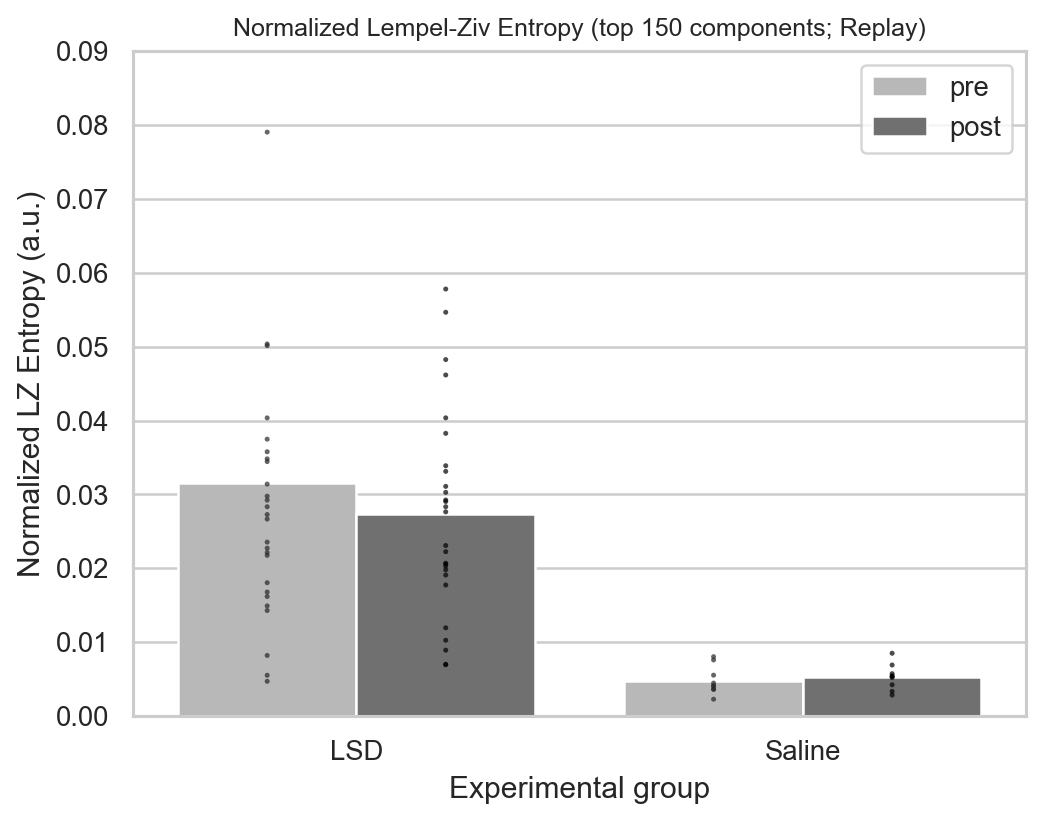

In [856]:
epoch_df = replay_df # <-- target epoch

# testing peculiar outliers (borderline cherrypicking)
#if epoch_df is replay_df:
    #epoch_df = epoch_df[epoch_df['eid'] != '2583567d-cd2a-485a-8d79-85aa619e1ce2']
    #epoch_df = epoch_df[epoch_df['eid'] != '996f3585-b804-4a3d-878a-1c15d708962b']


anova = pg.mixed_anova(
                        dv = 'lz_entropy',
                        within = 'time',
                        between = 'condition',
                        subject = 'eid',
                        data = epoch_df)

print(anova)



gray_blue_palette = ['#b8b8b8', '#707070']  # light and dark gray-blue

ax = sns.barplot(data=epoch_df, x='condition', y='lz_entropy', hue='time', palette=gray_blue_palette, ci = 95, errwidth=0, dodge = True)
ax1 = sns.stripplot(data=epoch_df, x='condition', y='lz_entropy', hue = 'time', color='black', size=2, alpha = 0.7, jitter=False, dodge=True, ax=ax, legend=None)

ax.legend(title = "Administration", title_fontsize = 8, fontsize = 8)
ax1.legend()
plt.title(f'Normalized Lempel-Ziv Entropy (top 150 components; Replay)', fontsize = 10)

plt.ylabel('Normalized LZ Entropy (a.u.)')
plt.xlabel("Experimental group")
plt.ylim(0, 0.09)
plt.show()

In [ ]:
replay_df['eid'][replay_df['lz_entropy']>0.06]


22    996f3585-b804-4a3d-878a-1c15d708962b
28    2583567d-cd2a-485a-8d79-85aa619e1ce2
Name: eid, dtype: object

In [104]:
import statsmodels.formula.api as smf
import statsmodels

model = smf.mixedlm(
            formula= "lz_entropy ~ time * epoch * condition",
            data = all_data,
            groups = 'eid')

result = model.fit()

print(result.summary())

                           Mixed Linear Model Regression Results
Model:                         MixedLM            Dependent Variable:            lz_entropy
No. Observations:              216                Method:                        REML      
No. Groups:                    36                 Scale:                         0.0001    
Min. group size:               6                  Log-Likelihood:                613.0591  
Max. group size:               6                  Converged:                     Yes       
Mean group size:               6.0                                                         
-------------------------------------------------------------------------------------------
                                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------------------------
Intercept                                         0.020    0.003  7.614 0.000  0.015  0.026
time[T.post]   

c:\Users\marti\anaconda3\envs\iblenv\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


### individual entropy

In [762]:
eid1 = eids_cont.unique()[0]
pre1, post1 = load_pca_results(cont_results, eid1, epoch_name = 'replay')

_, temp_pre,_= get_eigen(pre1)
_, temp_post,_= get_eigen(post1)

# n_components x n_frames
temp_pre = temp_pre.T
temp_post = temp_post.T

Eigenmask matrix has shape  (81920, 500)
Temporal PC matrix has shape (18780, 500)
singular value array has shape  (500,)
Eigenmask matrix has shape  (81920, 500)
Temporal PC matrix has shape (16744, 500)
singular value array has shape  (500,)


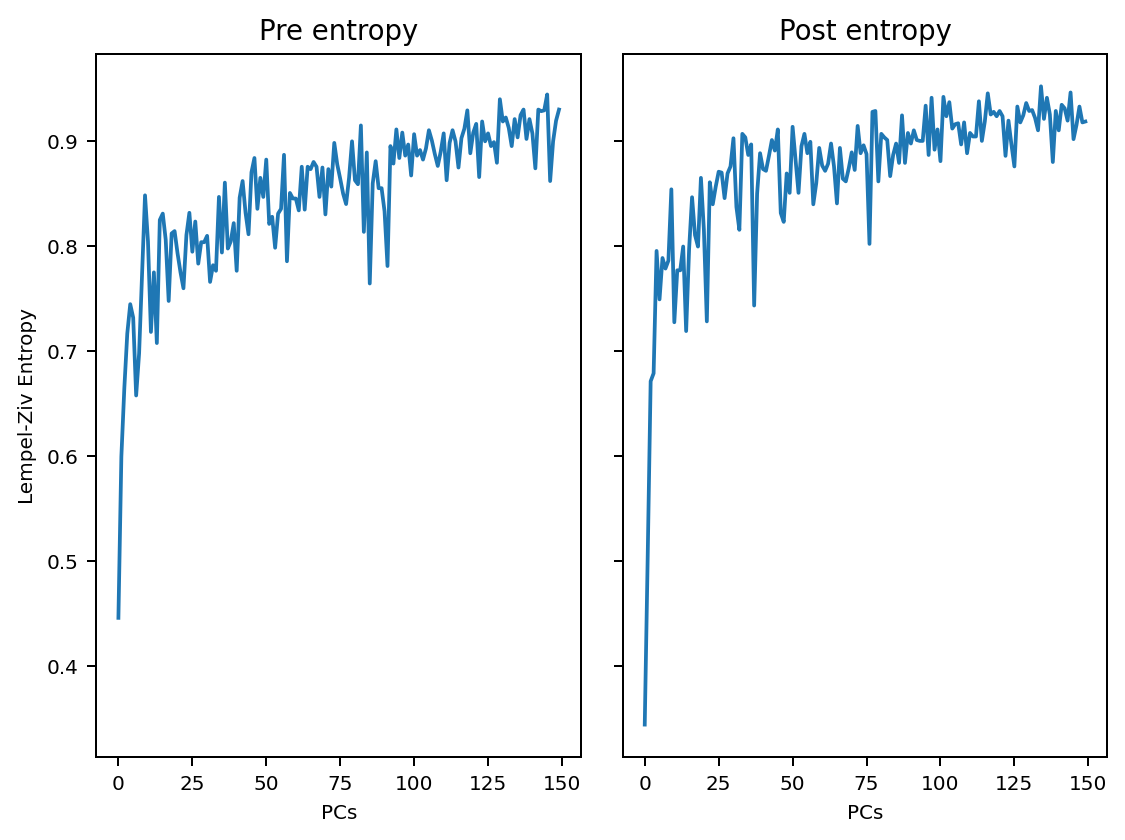

In [763]:
k = 150
pre_lzentropy = compute_lz_entropy(temp_pre, n_comps=k)
post_lzentropy = compute_lz_entropy(temp_post, n_comps=k)

fig, axs = plt.subplots(1, 2, sharey=True)

axs[0].plot(pre_lzentropy)
axs[0].set_ylabel("Lempel-Ziv Entropy")
axs[0].set_xlabel("PCs")
axs[0].set_title("Pre entropy")
axs[1].set_xlabel("PCs")

axs[1].plot(post_lzentropy)
axs[1].set_title("Post entropy")


plt.tight_layout()
plt.show()

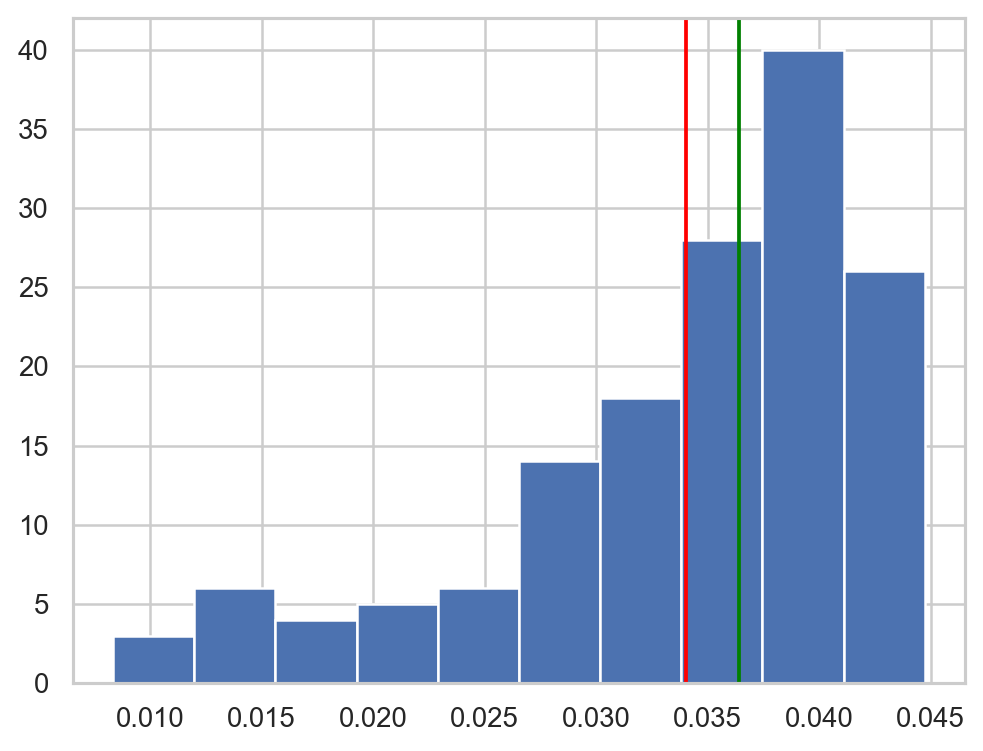

In [127]:
plt.hist(pre_lzentropy)
plt.axvline(np.mean(pre_lzentropy), color = 'red')
plt.axvline(np.median(pre_lzentropy), color = 'green')

# Reduced-Rank Regression: Neuropixel x Behavioral Motif

## setup

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib as mpl
from matplotlib import pyplot as plt
from datetime import datetime

from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer 
from scipy import stats

from psyfun import io, atlas, spikes, util, plots
from psyfun.config import *

df_sessions = pd.read_parquet(paths['sessions'])  # session info 
df_sessions = df_sessions.query('n_tasks >= 2').dropna(subset=['task00_spontaneous_start', 'task01_spontaneous_start'])

#Dropping massive outlier from my recordings
#Recording from ZFM-08457 on 2025-03-20
#Notes from recording: No spikes!!! -> SAC! [This recording should probably be removed from the dataset altogether]
df_sessions = df_sessions[df_sessions['eid'] != 'e31bff07-d66c-4a03-894d-f71030161ead']
df_sessions = df_sessions[df_sessions['eid'] != '58ca39c5-e27f-43c4-8516-2ccc4fe88042']
#no spikes
df_sessions = df_sessions[df_sessions['eid'] != '8868dff6-f4a6-4e84-b62c-24a0c97803c4']

## If no spikes then it shouldn't survive the merge below?? ##
# Load unit infor for all units
df_units = pd.read_parquet(paths['units'])  # unit info
df_units['coarse_region'] = atlas.coarse_regions(df_units['region'])

In [560]:
# Get eids for sessions with both tasks
eids = df_sessions['eid'].tolist()

# Find good-quality units from those sessions
df_unitquery = df_units.query('eid in @eids and ks2_label == "good"')
# Load spike times for good units
uuids = df_unitquery['uuid']
df_spiketimes = io.load_units(paths['spikes'], uuids)
# Join spike times with unit info
df_spikes = df_unitquery.set_index('uuid').join(df_spiketimes).reset_index()

# Merge session info into spikes dataframe
df_spikes = pd.merge(df_spikes, df_sessions, on=['subject', 'eid', 'session_n'], how='left')
# Clean up columns
df_spikes = df_spikes[[col for col in df_spikes.columns if not col.endswith('_x') or col.endswith('_y')]]
# df_spikes['region'] = df_spikes['region'].replace({'none':np.nan})

100%|██████████| 14877/14877 [00:17<00:00, 831.34it/s] 


In [561]:
# Define epochs of interest
epochs = [
    'task00_spontaneous', 
    'task00_rfm',
    'task00_replay',
    'task01_spontaneous', 
    'task01_rfm',
    'task01_replay'
]

In [ ]:
# Get spike counts for epochs of interest
dt = 1  # get spike counts in 1s bins
for epoch in epochs:
    print(f"Getting spike counts for: {epoch}")
    df_spikes[f'{epoch}_counts'] = df_spikes.progress_apply(spikes._get_spike_counts, epoch=epoch, dt=dt, axis='columns')
    df_spikes[f'{epoch}_rate'] = df_spikes[f'{epoch}_counts'].apply(lambda x: (x / dt).mean())

Getting spike counts for: task00_spontaneous


100%|██████████| 14877/14877 [00:06<00:00, 2181.47it/s]


Getting spike counts for: task00_rfm


100%|██████████| 14877/14877 [00:06<00:00, 2183.18it/s]


Getting spike counts for: task00_replay


100%|██████████| 14877/14877 [00:06<00:00, 2442.79it/s]


Getting spike counts for: task01_spontaneous


100%|██████████| 14877/14877 [00:06<00:00, 2268.49it/s]


Getting spike counts for: task01_rfm


100%|██████████| 14877/14877 [00:06<00:00, 2396.72it/s]


Getting spike counts for: task01_replay


100%|██████████| 14877/14877 [00:06<00:00, 2215.71it/s]


In [587]:
df_spikes

,uuid,depth,channel,cluster_id,amp_max,amp_min,amp_median,amp_std_dB,contamination,contamination_alt,...,task00_rfm_counts,task00_rfm_rate,task00_replay_counts,task00_replay_rate,task01_spontaneous_counts,task01_spontaneous_rate,task01_rfm_counts,task01_rfm_rate,task01_replay_counts,task01_replay_rate
0,ba063409-11d6-4e99-a66a-21a28d1e9785,20.0,1,6,0.001760,0.000091,0.001102,7.482291,1.759183,1.140347,...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.405405,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.158940,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.016667,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.622283,"[9, 8, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.460265
1,91c43304-2a63-40af-a3fa-3f8c1dc303b6,20.0,1,8,0.000997,0.000279,0.000518,2.478246,0.000000,0.000000,...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.237838,"[0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.175497,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.150000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.192935,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.294702
2,7c15d32c-0d7a-4396-906f-996a4ff01c1c,20.0,1,21,0.000869,0.000114,0.000242,4.596054,0.172476,0.140407,...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.240541,"[0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.827815,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.240000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.616848,"[24, 22, 5, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0...",1.549669
3,0c9bddbb-c566-4d3e-93a5-760112b1e025,60.0,5,39,0.000158,0.000050,0.000073,1.745749,0.011207,0.010352,...,"[9, 6, 9, 7, 11, 7, 6, 10, 7, 8, 7, 7, 8, 8, 8...",7.867568,"[8, 9, 8, 7, 8, 9, 7, 10, 12, 9, 9, 11, 9, 4, ...",8.589404,"[8, 6, 9, 6, 7, 6, 8, 6, 9, 10, 13, 7, 9, 8, 8...",7.993333,"[8, 5, 6, 8, 6, 8, 6, 7, 6, 10, 5, 8, 8, 8, 8,...",7.364130,"[6, 7, 4, 7, 7, 8, 8, 8, 7, 9, 8, 11, 9, 9, 8,...",6.158940
4,85c5fe1e-717c-4b62-b81c-cb8ae28c4b87,60.0,5,45,0.000219,0.000078,0.000088,0.950667,0.006042,0.005955,...,"[23, 23, 21, 28, 21, 22, 34, 28, 18, 25, 25, 2...",21.810811,"[22, 28, 29, 23, 19, 18, 21, 26, 23, 24, 18, 1...",24.612583,"[21, 22, 19, 15, 25, 20, 26, 19, 17, 26, 16, 2...",21.513333,"[22, 26, 19, 28, 15, 18, 19, 9, 18, 18, 23, 25...",17.853261,"[11, 14, 16, 15, 22, 20, 20, 28, 15, 24, 32, 2...",15.841060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14872,4f1c8e7c-d3e6-4a24-bd8d-504acb8ba49b,3040.0,302,851,0.000155,0.000048,0.000068,1.477730,0.053100,0.053738,...,"[3, 1, 0, 0, 1, 0, 0, 0, 1, 5, 4, 3, 1, 3, 6, ...",3.219101,"[4, 6, 5, 2, 2, 5, 2, 3, 3, 2, 2, 1, 0, 3, 2, ...",3.143770,"[7, 0, 6, 3, 2, 5, 5, 1, 3, 2, 7, 8, 1, 2, 2, ...",2.926667,"[1, 3, 2, 2, 3, 1, 6, 1, 3, 0, 0, 1, 3, 0, 0, ...",2.743733,"[0, 4, 3, 3, 2, 3, 3, 1, 5, 0, 1, 4, 1, 0, 1, ...",3.083067
14873,0da64910-6225-4e52-9c04-7dcce4a7d91c,3400.0,338,855,0.000217,0.000042,0.000103,1.394230,0.025030,0.022820,...,"[1, 2, 5, 0, 0, 6, 0, 0, 1, 0, 2, 0, 5, 1, 6, ...",1.811798,"[2, 1, 0, 0, 2, 4, 6, 1, 1, 0, 4, 0, 7, 6, 2, ...",1.696486,"[0, 1, 6, 0, 2, 0, 0, 2, 0, 11, 1, 0, 3, 0, 4,...",2.286667,"[3, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 3, 2, 3, 2, ...",2.144847,"[19, 9, 8, 6, 2, 5, 1, 3, 1, 0, 0, 7, 0, 0, 0,...",1.974441
14874,cf637808-9acc-4ef3-b5a4-77ec9cb496f1,3500.0,349,856,0.000099,0.000023,0.000048,1.779001,0.124494,0.105099,...,"[0, 7, 0, 0, 1, 2, 1, 0, 0, 2, 3, 0, 2, 2, 2, ...",1.764045,"[5, 0, 0, 13, 1, 0, 0, 3, 0, 3, 2, 8, 0, 0, 3,...",1.856230,"[2, 1, 3, 7, 4, 0, 4, 12, 0, 3, 1, 0, 6, 2, 6,...",1.823333,"[5, 0, 0, 1, 0, 1, 2, 0, 0, 5, 4, 2, 0, 0, 4, ...",1.465181,"[6, 2, 1, 4, 0, 2, 2, 2, 3, 1, 1, 0, 0, 1, 4, ...",1.581470
14875,e422ae5e-e311-43a4-ba0d-38676177df63,3500.0,349,857,0.000086,0.000030,0.000046,1.118850,0.000000,0.000000,...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.238764,"[0, 0, 1, 2, 1, 0, 0, 2, 1, 1, 1, 3, 0, 0, 0, ...",0.345048,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0

In [563]:
# neurons
df_spikes.groupby('eid').apply(len) 

C:\Users\marti\AppData\Local\Temp\ipykernel_3400\238203964.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_spikes.groupby('eid').apply(len)


eid
0bd26d4d-c1c1-4f59-af13-59d19b597ab6    385
1cbb24d0-2188-45dc-a116-e23a089c62b4    403
2583567d-cd2a-485a-8d79-85aa619e1ce2    507
3e9d9490-7fb2-4aa3-b8cd-83f216ad8cde    478
4b398979-c54c-498f-a3d4-b201c2285be5    788
4e3f021c-e553-4c67-988a-0ca52535748e    440
50322fbb-5b93-46d7-9ca0-391fa30c966a    547
53d8cb2f-3338-4bcd-81c4-6207b660eba3    529
55f3644c-3f86-423e-9beb-6604b5aa4e2c    279
58c61f29-d4e6-4ca7-b6de-bd860e83fe4e    582
5c28961e-1183-43f9-86a8-9c1c9d8ed743    450
6dc3fee9-6bfc-4daf-a70f-d726ac2fcfde    463
7149e0fc-a52d-4e93-849c-edc22d54e7a5    317
731a5f76-c4d6-4485-8584-7adeecdd6f3a    269
76bae405-b169-44ba-95db-b39342f21cf0    731
8057374c-baf2-4391-b290-e88743d8981a    568
86f743cd-ee0d-4ca5-a107-dca9a0cf3f7a    115
878b86b7-9245-40a3-843e-9ebf0a8251db    573
895fd80e-bb8a-4154-bd1f-436e6b8e1030    408
8dfd9963-25e5-4f63-8f91-5b27a5852628    200
90b53484-ed3d-4f62-9dc7-64170e4941ba    711
996f3585-b804-4a3d-878a-1c15d708962b    328
a6b9f254-7682-47a4-9abd-7530

In [859]:
# Neuron activity PCA

# Useful metadata for analysis downstream
columns_to_keep = ['subject', 'eid', 'session_n', 'control_recording', 'start_time']

pca_results = []
for idx, session_spikes in df_spikes.groupby('eid'): # add 'region' or any other columns to use for the grouping
    session_data = {col: session_spikes[col].unique()[0] for col in columns_to_keep}
    for epoch in epochs:
        print("neurons_n:", len(session_spikes[f'{epoch}_counts']))
        X = np.column_stack(session_spikes[f'{epoch}_counts']) # Puts all spikes into a features x samples matrix
        # transformer = PowerTransformer(method='yeo-johnson', standardize=True) # Pre-processing step to satisfy gaussianity assumption in PCA
        # X_rescaled = transformer.fit_transform(X)
        pca = PCA(n_components=100)
        X_pcs = pca.fit_transform(X)
        print(X_pcs.shape)
        session_data[f'{epoch}_eigenspectrum'] = pca.explained_variance_ratio_
        session_data[f'{epoch}_loadings'] = pca.components_
        session_data[f'{epoch}_projections'] = X_pcs
    pca_results.append(session_data)
df_pca = pd.DataFrame(pca_results)

neurons_n: 385
(300, 100)
neurons_n: 385
(400, 100)
neurons_n: 385
(303, 100)
neurons_n: 385
(300, 100)
neurons_n: 385
(402, 100)
neurons_n: 385
(302, 100)
neurons_n: 403
(300, 100)
neurons_n: 403
(414, 100)
neurons_n: 403
(311, 100)
neurons_n: 403
(300, 100)
neurons_n: 403
(428, 100)
neurons_n: 403
(311, 100)
neurons_n: 507
(300, 100)
neurons_n: 507
(379, 100)
neurons_n: 507
(312, 100)
neurons_n: 507
(300, 100)
neurons_n: 507
(519, 100)
neurons_n: 507
(311, 100)
neurons_n: 478
(300, 100)
neurons_n: 478
(356, 100)
neurons_n: 478
(312, 100)
neurons_n: 478
(300, 100)
neurons_n: 478
(358, 100)
neurons_n: 478
(313, 100)
neurons_n: 788
(300, 100)
neurons_n: 788
(370, 100)
neurons_n: 788
(302, 100)
neurons_n: 788
(300, 100)
neurons_n: 788
(406, 100)
neurons_n: 788
(302, 100)
neurons_n: 440
(300, 100)
neurons_n: 440
(357, 100)
neurons_n: 440
(313, 100)
neurons_n: 440
(300, 100)
neurons_n: 440
(359, 100)
neurons_n: 440
(313, 100)
neurons_n: 547
(300, 100)
neurons_n: 547
(398, 100)
neurons_n: 5

In [441]:
# the only two sessions with motor cortex data
# 2583567d-cd2a-485a-8d79-85aa619e1ce2
# a7a4a70f-57ae-4586-bb2d-37422deca541

In [600]:
# raw spike counts

columns_to_keep = ['subject', 'eid', 'session_n', 'control_recording', 'start_time']

neu_results = []
for idx, session_spikes in df_spikes.groupby('eid'): # add 'region' or any other columns to use for the grouping
    session_data = {col: session_spikes[col].unique()[0] for col in columns_to_keep}
    for epoch in epochs:
        neu_count = np.column_stack(session_spikes[f'{epoch}_counts'])
        session_data[f'{epoch}_neuronmatrix'] = neu_count
    neu_results.append(session_data)
neucounts_df = pd.DataFrame(neu_results)

## Functions

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from scipy.stats import binned_statistic


def reduced_rank_regression(X, Y, rank):
    """
    Perform Reduced Rank Regression (RRR) to predict multivariate Y from X,
    constrained to a linear subspace of dimension `rank`.

    Assumes time alignment between behavioral motifs and neural data.

    Parameters
    -----------
    X : ndarray of shape (n_samples, n_features_X)
        Input data matrix (e.g., neural activity). It has to be (timebins, components).
    
    Y : ndarray of shape (n_samples, n_features_Y)
        Output data matrix (e.g., behavioral projections). Traspose if needed
    
    rank : int
        Desired rank of the regression matrix (number of latent dimensions).

    Returns
    --------
    Y_pred : ndarray of shape (n_samples, n_features_Y)
        Predicted values of Y using the reduced-rank regression model.

    B_rrr : ndarray of shape (n_features_X, n_features_Y)
        Reduced-rank regression coefficient matrix (X @ B_rrr = Y_pred).
    """
    assert rank <= Y.shape[1]
    # Centering

    Xc = X - X.mean(axis =0)
    Yc = Y - Y.mean(axis =0)

    # Full-rank regression (least squares)
    B_ols = np.linalg.pinv(Xc) @ Yc  # shape (n_features_X, n_features_Y)

    # Predict Y using full-rank solution
    Y_hat = Xc @ B_ols  # shape: (n_samples, n_features_Y)


    # SVD of the predicted responses (dissects 'rank' PCs)
    _, _, Vt = np.linalg.svd(Y_hat, full_matrices=False)


    Vt_r = Vt[:rank, :]  # shape: (rank, n_features_Y)
    Vt_r = Vt_r.T 

    # Reduced-rank regression matrix
    B_rrr = B_ols @ Vt_r @ Vt_r.T  # shape: (n_features_X, n_features_Y)

    # Predict Y using RRR and re-add the mean (decenter)
    Y_pred = Xc @ B_rrr + Y.mean(axis=0)  # shape: (n_samples, n_features_Y)

    return Y_pred, B_rrr


def cross_validate_rank(X, Y, max_rank=1000, n_splits=5, metric='r2', ranks= 'log'):
    """
    Cross-validate Reduced Rank Regression (RRR) to select optimal rank.

    Parameters
    -----------
    X : ndarray (n_samples, n_features_X)
    Y : ndarray (n_samples, n_features_Y)
    
    max_rank : int
        Maximum rank to test. Set to Y.shape[1] otherwise.
    n_splits : int
        Number of folds in K-Fold cross-validation.
    metric : str
        Scoring metric: 'r2' or 'mse'.
    ranks : list or array-like, optional
        Specific ranks to evaluate (overrides max_rank).

    Returns
    --------
    scores : dict
        Average CV score for each rank.
    best_rank : int
        Rank with best score (max R² or min MSE).
    """

    assert X is not None and Y is not None
    
    max_rank = min(max_rank, X.shape[1])
    
    if ranks == 'log' and max_rank >= 30:
        ranks = np.unique(np.logspace(0, np.log10(max_rank), num=10, dtype=int))

    elif max_rank < 50:
            ranks = np.arange(1, max_rank + 1)

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = {}

    for r in ranks:
        fold_scores = []
        for train_idx, test_idx in kf.split(X):
            X_train, Y_train = X[train_idx], Y[train_idx]
            X_test, Y_test = X[test_idx], Y[test_idx]

            # Train RRR on training data
            _, B_rrr= reduced_rank_regression(X_train, Y_train, rank=r)

            # Center X_test to X_train space
            # Predict Y_test using centered X_test and B_rrr
            X_test_c = X_test - X_train.mean(axis=0)
            Y_test_pred = X_test_c @ B_rrr + Y_train.mean(axis=0)

            # Score
            if metric == 'r2':
                score = r2_score(Y_test, Y_test_pred, multioutput='uniform_average')
            elif metric == 'mse':
                score = np.mean((Y_test - Y_test_pred) ** 2)
            else:
                raise ValueError("Unsupported metric: choose 'r2' or 'mse'")

            fold_scores.append(score)

        scores[r] = np.mean(fold_scores) 
        print("Rank ", r, "yielded a mean score: ", np.mean(fold_scores))


    best_rank = max(scores, key=scores.get) if metric == 'r2' else min(scores, key=scores.get)
    return scores, best_rank


def align_behavior_neural(projections, spikes, bin_size=1.0, bin_method = 'mean', fillna="interpolate"):
    """
    Aligns behavioral projections to spike count bins with NaN protection.

    Parameters
    ----------
    projections : np.ndarray (n_frames, n_comps)
    spikes : np.ndarray (n_bins, n_neurons)
    bin_size : float (spike count bin size)
    bin_method: str (Method used to bin-aggregate.) Mean/Median supported.
    fillna : str or float
        How to fill empty bins (NaNs): 'interpolate', 'zero', 'mean', or a float.

    Returns
    -------
    binned_behavior : np.ndarray (n_bins, n_comps)
    """
    n_bins = spikes.shape[0]
    duration = n_bins * bin_size
    bin_edges = np.linspace(0, duration, n_bins + 1)

    # Behavioral time in seconds
    behavioral_times = np.arange(projections.shape[0]) / 60.0

    # Keep only frames within duration
    mask = behavioral_times < duration + 1e-6  # small epsilon to include edge
    behavioral_times = behavioral_times[mask]
    projections = projections[mask]

    n_comps = projections.shape[1]
    binned_behavior = []

    for i in range(n_comps):
        stat, _, _ = binned_statistic(behavioral_times, projections[:, i],
                                      statistic=bin_method, bins=bin_edges)
        
        # Handle NaNs
        if np.any(np.isnan(stat)):
            if fillna == 'interpolate':
                not_nan = ~np.isnan(stat)
                stat = np.interp(np.arange(len(stat)), np.flatnonzero(not_nan), stat[not_nan])
            elif fillna == 'zero':
                stat = np.nan_to_num(stat, nan=0.0)
            elif fillna == 'mean':
                stat = np.nan_to_num(stat, nan=np.nanmean(stat))
            elif isinstance(fillna, (float, int)):
                stat = np.nan_to_num(stat, nan=fillna)
            else:
                raise ValueError("Invalid fillna option.")
        
        binned_behavior.append(stat)

    binned_behavior = np.stack(binned_behavior, axis=1)
    return binned_behavior

## Individual RRR

In [860]:
# let's build the regression for an specific pre replay epoch


#------------- behavioral
k = 150 # <- components

eid = eids_exp.unique()[0]

# verbatim for clarity
epoch_sel = 'replay'
pre = '00'
post = '01'


# behavioral data
pre_exp, post_exp = load_pca_results(exp_results, eid, epoch_sel)

_, pre_temp, _ = get_eigen(pre_exp) # (n_frames, ncomps)
pre_temp = pre_temp[:,:k]
print("Behavioral motif timeseries for eid", eid, "in epoch", epoch_sel, "(admin time",pre,")")

# neural data
print("PCA spike activity for eid", eid, "in epoch", epoch_sel, " (admin_time", pre, ")")

# all containing 100 neuron acitivity dimensions
spike_pcs= df_pca[f'task{pre}_{epoch_sel}_projections'][df_pca['eid'] == eid].values[0]

raw_spikes = neucounts_df[f'task{pre}_{epoch_sel}_neuronmatrix'][neucounts_df['eid'] == eid].values[0]

print("Behavioral timeseries shape", pre_temp.shape)


print("PCA spike activity shape", spike_pcs.shape)

print("Raw spikes shape",raw_spikes.shape )

Eigenmask matrix has shape  (81920, 500)
Temporal PC matrix has shape (18120, 500)
singular value array has shape  (500,)
Behavioral motif timeseries for eid 7149e0fc-a52d-4e93-849c-edc22d54e7a5 in epoch replay (admin time 00 )
PCA spike activity for eid 7149e0fc-a52d-4e93-849c-edc22d54e7a5 in epoch replay  (admin_time 00 )
Behavioral timeseries shape (18120, 150)
PCA spike activity shape (302, 100)
Raw spikes shape (302, 317)


(302, 150)


Text(0.5, 1.0, 'After binning')

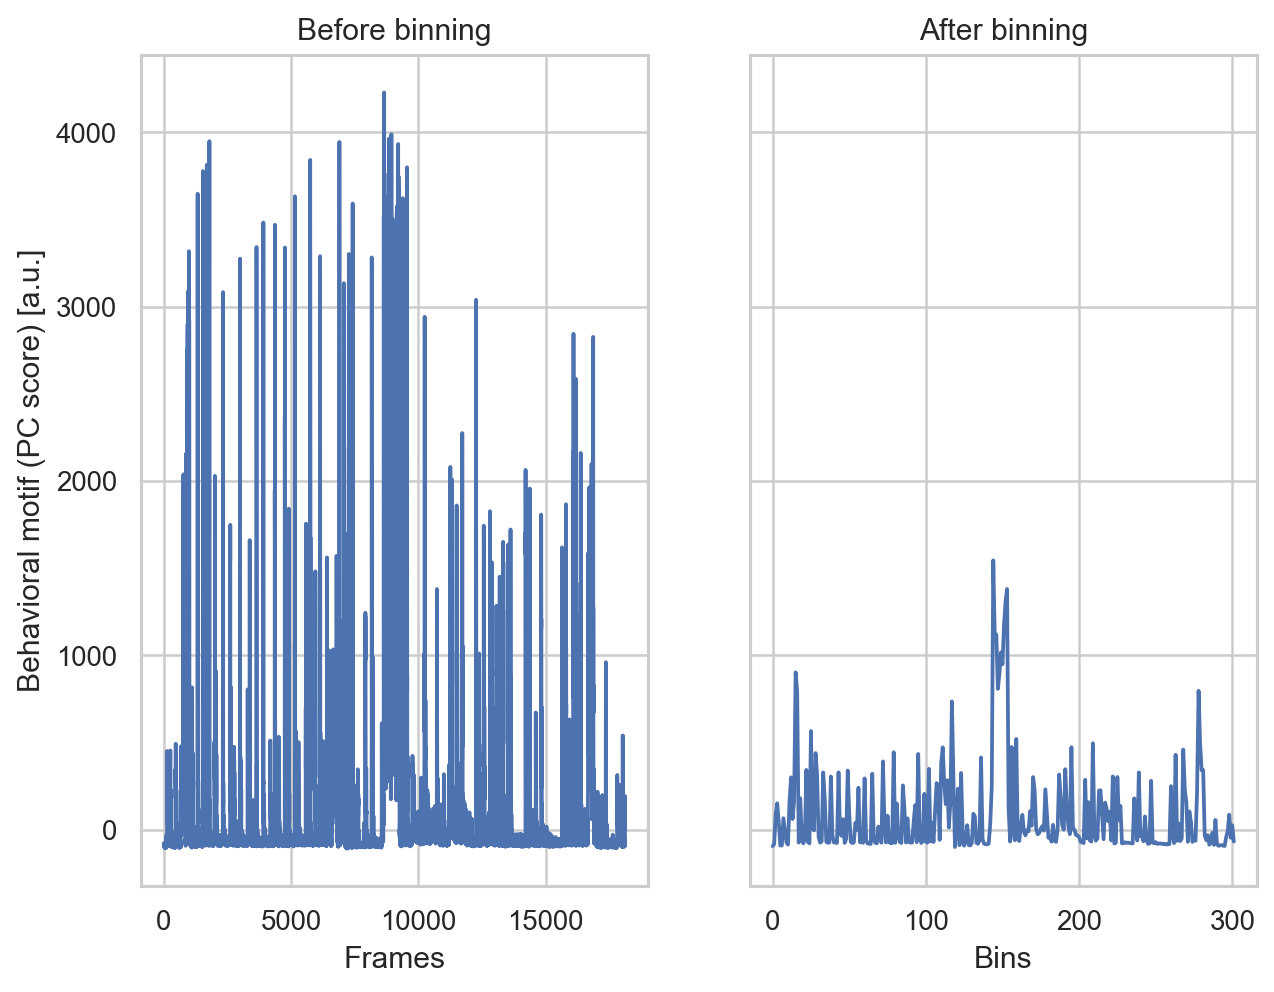

In [861]:
#Alignment
import matplotlib.pyplot as pl

binned_projection = align_behavior_neural(pre_temp, spike_pcs, bin_size=1, bin_method='mean', fillna='interpolate')
print(binned_projection.shape)

fig, axs = pl.subplots(ncols=2, figsize = (8,6), sharey=True)
im1 = axs[0].plot(pre_temp[:,0])
im2 = axs[1].plot(binned_projection[:,0])

axs[0].set_ylabel("Behavioral motif (PC score) [a.u.]")
axs[0].set_xlabel('Frames')
axs[0].set_title('Before binning')

axs[1].set_xlabel('Bins')
axs[1].set_title('After binning')

In [862]:
from sklearn.linear_model import LinearRegression, Ridge
import sklearn
from sklearn import model_selection

model = LinearRegression().fit(spike_pcs, binned_projection)

baseline = r2_score(binned_projection, model.predict(spike_pcs))
print(baseline)
scores = model_selection.cross_validate(model, spike_pcs, binned_projection, cv = 5, scoring='r2')

print(np.mean(scores['test_score']))

0.3870284286663049
-2.240721303277411


In [598]:
print(binned_projection.shape)

(302, 150)


In [577]:
print(spike_pcs.shape)

(302, 302)


In [863]:
r2_scores = []
for r in np.arange(min(binned_projection.shape[0], binned_projection.shape[1], spike_pcs.shape[1])+1):
    pred, _ = reduced_rank_regression(X= spike_pcs, Y = binned_projection, rank = r)
    score = r2_score(binned_projection, pred)
    r2_scores.append((r, score))

In [770]:
r2_scores

[(0, 0.0),
 (1, 0.039365907247764606),
 (2, 0.05216607902385338),
 (3, 0.07175591088489873),
 (4, 0.08140529002130653),
 (5, 0.087402547994099),
 (6, 0.08935279985407721),
 (7, 0.09027432027024763),
 (8, 0.09063191682457165),
 (9, 0.09094944733885388),
 (10, 0.09096013783102505)]

In [864]:
r2_scores = pd.DataFrame(r2_scores, columns=['rank', 'r2'])

In [612]:
r2_scores

,rank,r2
0,0,0.000000
1,1,0.015801
2,2,0.029136
3,3,0.041776
4,4,0.058736
...,...,...
96,96,0.386894
97,97,0.386937
98,98,0.386978
99,99,0.387010


Text(0, 0.5, 'Model performance (R2)')

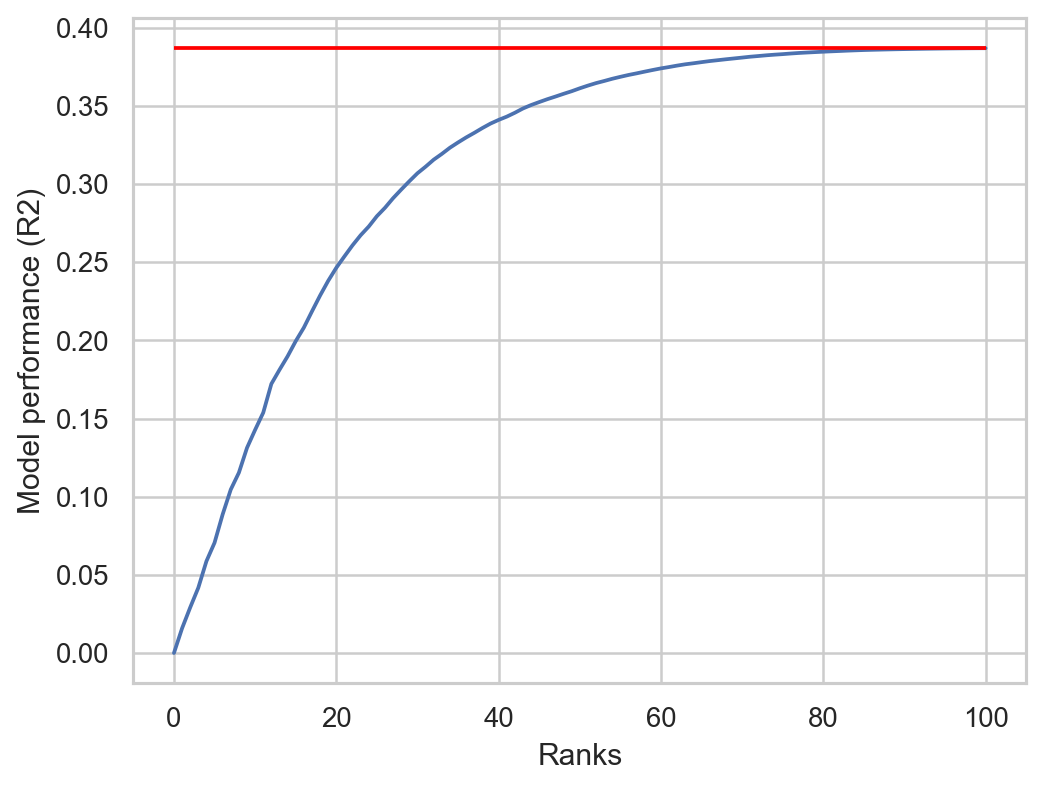

In [865]:
plt.plot(r2_scores['rank'],r2_scores['r2'])
plt.hlines(baseline, xmin= 0, xmax=100, colors='red', linestyles= "solid")
plt.xlabel("Ranks")
plt.ylabel("Model performance (R2)")


In [641]:
pred, Beta = reduced_rank_regression(X = spike_pcs, Y = binned_projection, rank = 60)
# function is good
print(baseline*tolerance)
r2_score(y_true = binned_projection, y_pred=pred)>baseline*0.95

0.36767697213030703


True

In [430]:
scores, best = cross_validate_rank(spike_pcs, binned_projection, max_rank= 500, n_splits=10, metric = 'r2')

Rank  1 yielded a mean score:  -0.040608831014981805
Rank  2 yielded a mean score:  -0.048551808839061794
Rank  3 yielded a mean score:  -0.05686800120647957
Rank  4 yielded a mean score:  -0.06553977268741266
Rank  6 yielded a mean score:  -0.07833424864583396
Rank  9 yielded a mean score:  -0.09455087470054521
Rank  14 yielded a mean score:  -0.11985159976447571
Rank  21 yielded a mean score:  -0.14788846225175337
Rank  30 yielded a mean score:  -0.16057113545422622


In [ ]:
print(scores.items())

dict_items([(1, -0.05037839997958786), (2, -0.08765912096939982), (4, -0.1369947171388059), (7, -0.2097008438886348), (12, -0.29468958980941073), (21, -0.4666657587602767), (35, -0.6725472870907995), (59, -0.8669492636798981), (100, -0.966526381113899)])


 doing spike counts alone is a joke.

## Full RRR

In [655]:
0.95*0.36

0.34199999999999997

In [732]:
## experimental case
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt
from psyfun import util
from sklearn.linear_model import LinearRegression, Ridge
from sklearn import model_selection



k = 150 # <-- components to keep
rank_search = 1
tolerance = 0.95
experimental = [] # eid, epoch, time, rank - r2 cross val (dict), mean ridge r2 (full PCA rank, 100)
for eid in eids_exp:
    
    for epoch in ['spontaneous', 'rfm', 'replay']:
        
        #-------------- behavioral -------------------------
        # loading behvioral info
        pre, post = load_pca_results(exp_results, eid, epoch_name=epoch)

        # n_frames, n_comp(500)
        _, pre_projection, _ = get_eigen(pre) 
        _, post_projection,_ = get_eigen(post)

        # extracting top 150 behavioral components
        pre_projection = pre_projection[:,:k]
        post_projection = post_projection[:,:k]

        #-------------- neural -------------------------------

        spike_pre = df_pca[f'task00_{epoch}_projections'][df_pca['eid'] == eid].values[0]
        spike_post = df_pca[f'task01_{epoch}_projections'][df_pca['eid'] == eid].values[0]

        pre_binned = align_behavior_neural(pre_projection, spike_pre)
        post_binned = align_behavior_neural(post_projection, spike_post)

        print("pre_binned shape:", pre_binned.shape)
        print("post_binned shape:", post_binned.shape)
        #-------------- Ridge Regression (baseline) -------------------------
        model = Ridge().fit(spike_pre, pre_binned)
        baseline_pre = r2_score(pre_binned, model.predict(spike_pre))
        print("baseline_pre:", baseline_pre)
        model = Ridge().fit(spike_post, post_binned)
        baseline_post = r2_score(post_binned, model.predict(spike_post))
        print("baseline_post:", baseline_post)

        
        #-------------- Reduced Rank -----------------------------------------
        for r in np.arange(0, min(pre_binned.shape[0], pre_binned.shape[1], spike_pre.shape[1])+1, rank_search):
            print("Testing rank", r)

            pred, _ = reduced_rank_regression(X= spike_pre, Y = pre_binned, rank = r)
            score = r2_score(pre_binned, pred)
            if score >= baseline_pre * tolerance:
                min_rank = r
                break

        experimental.append((eid, epoch, 'pre', baseline_pre, min_rank))

        for r in np.arange(0, min(post_binned.shape[0], post_binned.shape[1], spike_post.shape[1])+1, rank_search):
            print("Testing rank", r)
            pred, _ = reduced_rank_regression(X= spike_post, Y = post_binned, rank = r)
            score = r2_score(post_binned, pred)
            if score >= baseline_post * tolerance:
                min_rank = r
                break

        experimental.append((eid, epoch, 'post', baseline_post, min_rank))

        print("Regressions completed for ", eid, " in epoch ", epoch)


## control case

control = []
for eid in eids_cont:
    for epoch in ['spontaneous', 'rfm', 'replay']:
        
        #-------------- behavioral -------------------------
        # loading behvioral info
        pre, post = load_pca_results(cont_results, eid, epoch_name=epoch)

        # n_frames, n_comp(500)
        _, pre_projection, _ = get_eigen(pre) 
        _, post_projection,_ = get_eigen(post)

        # extracting top 150 behavioral components
        pre_projection = pre_projection[:,:k]
        post_projection = post_projection[:,:k]

        #-------------- neural -------------------------------

        spike_pre = df_pca[f'task00_{epoch}_projections'][df_pca['eid'] == eid].values[0]
        spike_post = df_pca[f'task01_{epoch}_projections'][df_pca['eid'] == eid].values[0]

        pre_binned = align_behavior_neural(pre_projection, spike_pre)
        post_binned = align_behavior_neural(post_projection, spike_post)

        print("pre_binned shape:", pre_binned.shape)
        print("post_binned shape:", post_binned.shape)

        #-------------- Ridge Regression (baseline) -------------------------
        model = Ridge().fit(spike_pre, pre_binned)
        baseline_pre = r2_score(pre_binned, model.predict(spike_pre))

        model = Ridge().fit(spike_post, post_binned)
        baseline_post = r2_score(post_binned, model.predict(spike_post))
        
        #-------------- Reduced Rank -----------------------------------------
        for r in np.arange(0, min(pre_binned.shape[0], pre_binned.shape[1], spike_pre.shape[1])+1, rank_search):
            print("Testing rank", r)
            pred, _ = reduced_rank_regression(X= spike_pre, Y = pre_binned, rank = r)
            score = r2_score(pre_binned, pred)
            if score >= baseline_pre * tolerance:
                min_rank = r
                break

        control.append((eid, epoch, 'pre', baseline_pre, min_rank))

        for r in np.arange(0, min(post_binned.shape[0], post_binned.shape[1], spike_post.shape[1])+1, rank_search):
            print("Testing rank", r)

            pred, _ = reduced_rank_regression(X= spike_post, Y = post_binned, rank = r)
            score = r2_score(post_binned, pred)
            print
            if score > baseline_post * tolerance:
                min_rank = r
                break

        control.append((eid, epoch, 'post', baseline_post, min_rank))
        
        print("Regressions completed for ", eid, " in epoch ", epoch)



#  dataframe
exp_data = pd.DataFrame(experimental, columns = ['eid', 'epoch', 'time','baseline_ridge','rrr_rank'])
control_data = pd.DataFrame(control, columns = ['eid', 'epoch', 'time', 'baseline_ridge', 'rrr_rank'])

# MIXED ANOVA
exp_data['condition'] = 'LSD'
control_data['condition'] = 'Saline'

all_data = pd.concat([exp_data, control_data], ignore_index=True)

Eigenmask matrix has shape  (81920, 500)
Temporal PC matrix has shape (18000, 500)
singular value array has shape  (500,)
Eigenmask matrix has shape  (81920, 500)
Temporal PC matrix has shape (18000, 500)
singular value array has shape  (500,)
pre_binned shape: (300, 150)
post_binned shape: (300, 150)
baseline_pre: 0.388802453398559
baseline_post: 0.40079490412962904
Testing rank 0
Testing rank 1
Testing rank 2
Testing rank 3
Testing rank 4
Testing rank 5
Testing rank 6
Testing rank 7
Testing rank 8
Testing rank 9
Testing rank 10
Testing rank 11
Testing rank 12
Testing rank 13
Testing rank 14
Testing rank 15
Testing rank 16
Testing rank 17
Testing rank 18
Testing rank 19
Testing rank 20
Testing rank 21
Testing rank 22
Testing rank 23
Testing rank 24
Testing rank 25
Testing rank 26
Testing rank 27
Testing rank 28
Testing rank 29
Testing rank 30
Testing rank 31
Testing rank 32
Testing rank 33
Testing rank 34
Testing rank 35
Testing rank 36
Testing rank 37
Testing rank 38
Testing rank 39


In [733]:
all_data['condition'] = all_data['condition'].astype('category')

# epoch ordering
all_data['epoch'] = all_data['epoch'].astype('category')
all_data['epoch'] = pd.Categorical(all_data['epoch'], categories=['spontaneous', 'rfm', 'replay'], ordered=True)

# pre/post ordering
all_data['time'] = all_data['time'].astype('category')
all_data['time'] = pd.Categorical(all_data['time'], categories=['pre', 'post'], ordered=True)

In [867]:
all_data = pd.read_csv('ranks_nocv')

In [868]:
spo_df = all_data.query("epoch == 'spontaneous'")
rfm_df = all_data.query("epoch == 'rfm'")
replay_df = all_data.query("epoch == 'replay'")

        Source          SS  DF1  DF2          MS         F     p-unc  \
0    condition  245.818182    1   31  245.818182  6.330958  0.017256   
1         time    7.333333    1   31    7.333333  0.429922  0.516864   
2  Interaction    4.888889    1   31    4.888889  0.286615  0.596218   

        np2  eps  
0  0.169590  NaN  
1  0.013679  1.0  
2  0.009161  NaN  


C:\Users\marti\AppData\Local\Temp\ipykernel_3400\2668256120.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(data=epoch_df, x='condition', y='rrr_rank', hue='time', palette=gray_blue_palette, ci = 95, errwidth=0, dodge = True)
C:\Users\marti\AppData\Local\Temp\ipykernel_3400\2668256120.py:16: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  ax = sns.barplot(data=epoch_df, x='condition', y='rrr_rank', hue='time', palette=gray_blue_palette, ci = 95, errwidth=0, dodge = True)
C:\Users\marti\AppData\Local\Temp\ipykernel_3400\2668256120.py:17: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  ax1 = sns.stripplot(data=epoch_df, x='condition', y='rrr_rank', hue = 'time', color='black', size=2, alpha = 0.7, jitter=True, dodge=True, ax

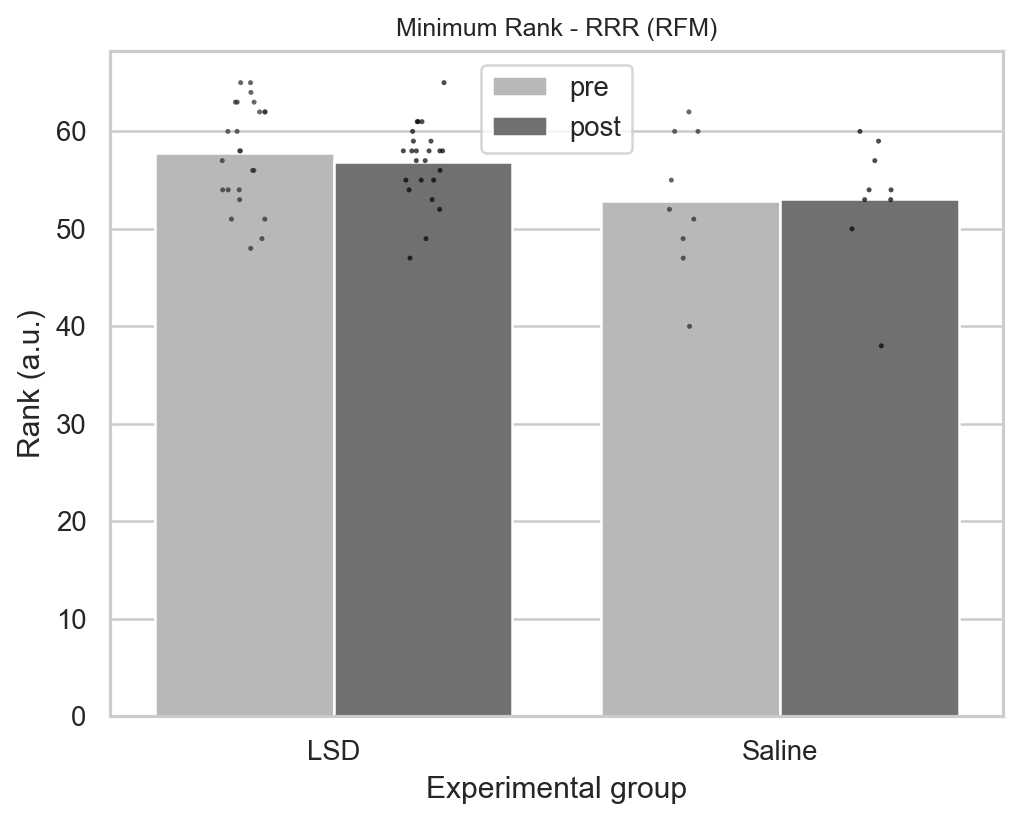

In [873]:
epoch_df = rfm_df # <-- target epoch

anova = pg.mixed_anova(
                        dv = 'rrr_rank',
                        within = 'time', # change back to 'time'
                        between = 'condition',
                        subject = 'eid',
                        data = epoch_df)

print(anova)



gray_blue_palette = ['#b8b8b8', '#707070']  # light and dark gray-blue

ax = sns.barplot(data=epoch_df, x='condition', y='rrr_rank', hue='time', palette=gray_blue_palette, ci = 95, errwidth=0, dodge = True)
ax1 = sns.stripplot(data=epoch_df, x='condition', y='rrr_rank', hue = 'time', color='black', size=2, alpha = 0.7, jitter=True, dodge=True, ax=ax, legend=None)

ax.legend(title = "Administration", title_fontsize = 8, fontsize = 8)
ax1.legend()
plt.title(f'Minimum Rank - RRR (RFM)', fontsize = 10)

plt.ylabel('Rank (a.u.)')
plt.xlabel("Experimental group")
plt.show()

## change in rank

In [742]:
# Step 1: Pivot the DataFrame so 'pre' and 'post' become columns
df_wide = all_data.pivot(index=['eid', 'epoch','condition'], columns='time', values='rrr_rank').reset_index()

# Step 2: Compute the delta (post - pre)
df_wide['change'] = df_wide['post'] - df_wide['pre']

# Step 3: (Optional) Clean or reorder columns
df_deltas = df_wide[['eid', 'epoch','condition', 'change']]

In [743]:
df_deltas

time,eid,epoch,condition,change
0,0bd26d4d-c1c1-4f59-af13-59d19b597ab6,spontaneous,LSD,2
1,0bd26d4d-c1c1-4f59-af13-59d19b597ab6,rfm,LSD,2
2,0bd26d4d-c1c1-4f59-af13-59d19b597ab6,replay,LSD,1
3,1cbb24d0-2188-45dc-a116-e23a089c62b4,spontaneous,LSD,-8
4,1cbb24d0-2188-45dc-a116-e23a089c62b4,rfm,LSD,-8
...,...,...,...,...
94,e13d0e58-55c8-4787-a716-03549b3d0240,rfm,LSD,4
95,e13d0e58-55c8-4787-a716-03549b3d0240,replay,LSD,-2
96,e8128c55-b322-438a-9498-edd47ae4b794,spontaneous,Saline,-1
97,e8128c55-b322-438a-9498-edd47ae4b794,rfm,Saline,10


## neuropop

In [646]:
def mean_center(matrix):
    return matrix - np.mean(matrix, axis = 0)

In [696]:
import neuropop
import neuropop.linear_prediction

spike_c = mean_center(spike_pcs)
binned_c = mean_center(binned_projection)

print("Spikes PCs shape:", spike_c.shape, "-->", spike_c.shape[0],"time bins,", spike_c.shape[1], "neural dimensions")
print("Behavioral timeseries shape:", binned_c.shape,"-->", binned_c.shape[0],"time bins,", binned_c.shape[1], "Behavioral projections")

_, varexp, _, _, _, varexp_feature, corr_feature  = neuropop.linear_prediction.linear_prediction(X=spike_c, Y= binned_c, rank = min(binned_c.shape[1], spike_c.shape[1]), allranks=True)
full_rank_ve = varexp[-1]
threshold = 0.95 * full_rank_ve
min_rank = np.argmax(varexp >= threshold)

print(f"Full-rank variance explained: {full_rank_ve:.4f}")
print(f"Minimum rank to reach 95% of full-rank performance: {min_rank+1}")
# full-rank ridge regression (CV!)


Spikes PCs shape: (302, 100) --> 302 time bins, 100 neural dimensions
Behavioral timeseries shape: (302, 150) --> 302 time bins, 150 Behavioral projections
Full-rank variance explained: -0.2199
Minimum rank to reach 95% of full-rank performance: 1


Text(0.5, 1.0, 'Model Variance explained across increasing rank')

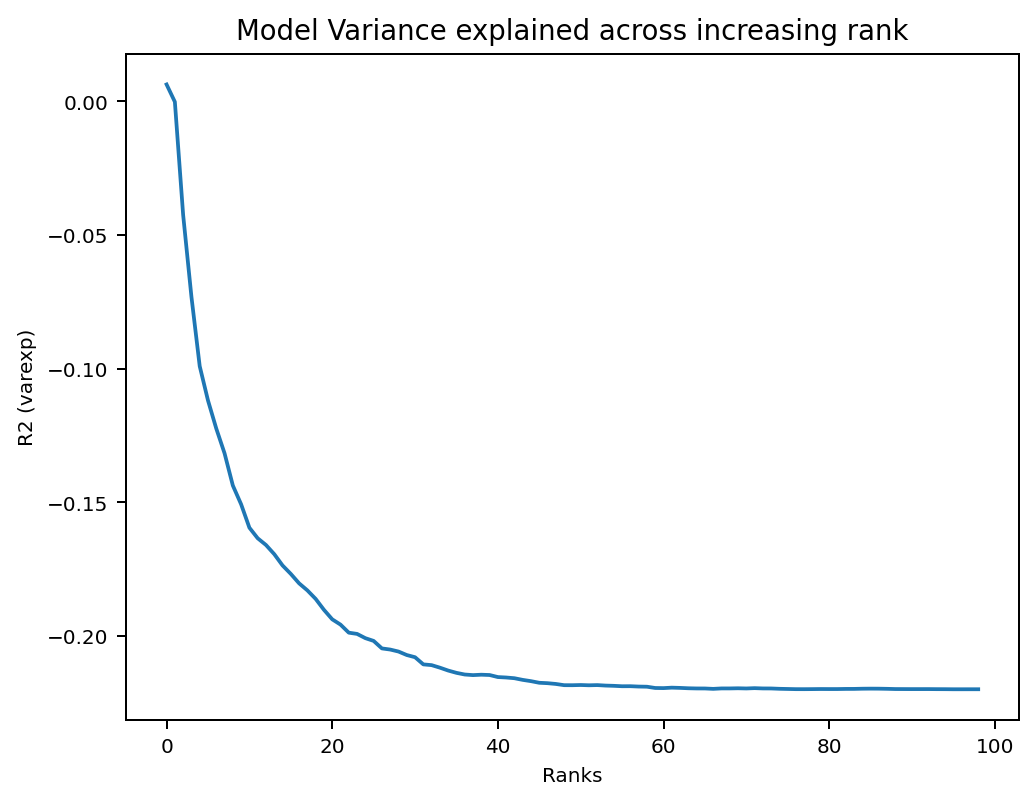

In [712]:
plt.plot(np.arange(varexp.shape[0]), varexp)
plt.xlabel("Ranks")
plt.ylabel("R2 (varexp)")
plt.title("Model Variance explained across increasing rank")

In [697]:
varexp_feature.shape

(99, 150)

Text(0.5, 1.0, 'Variance explained per feature')

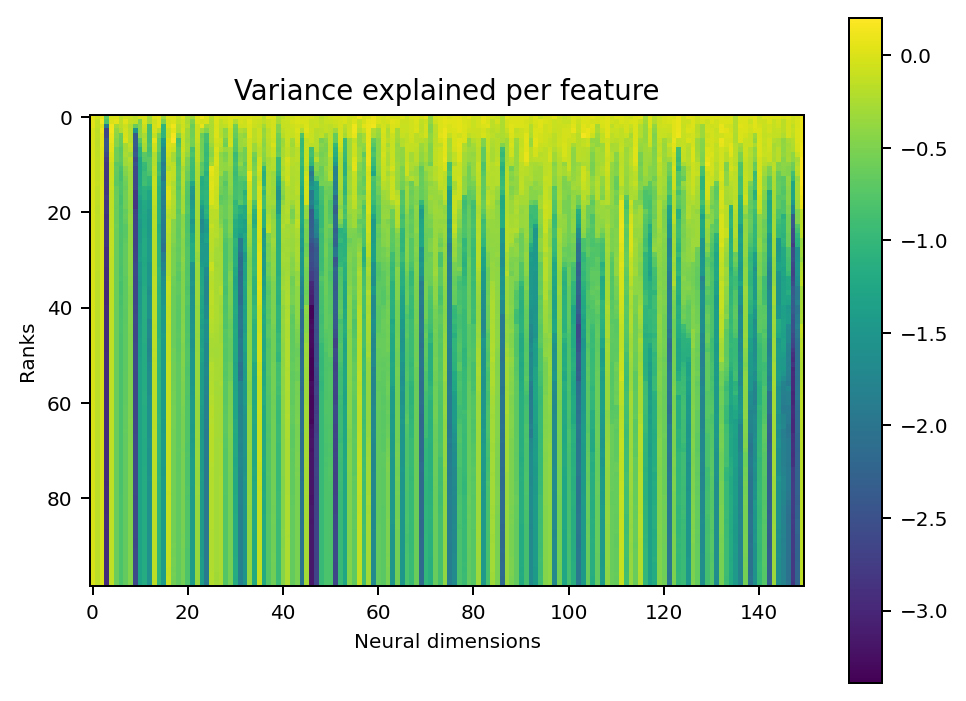

In [713]:
plt.imshow(varexp_feature, cmap = 'viridis')
plt.xlabel("Neural dimensions")
plt.ylabel("Ranks")
plt.colorbar()
plt.title("Variance explained per feature")

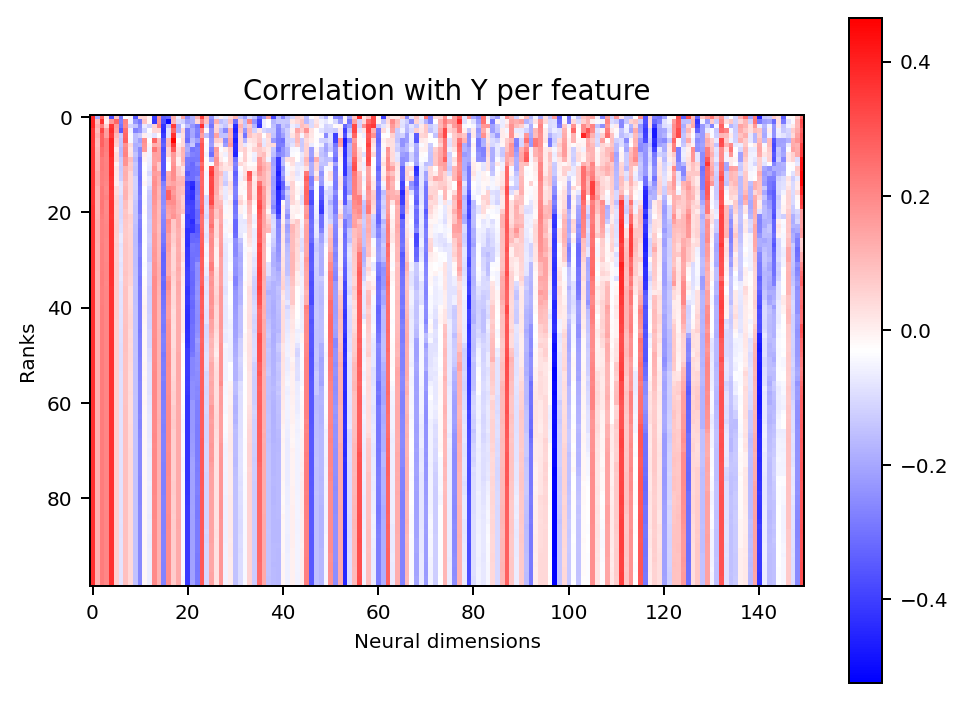

In [ ]:
plt.imshow(corr_feature, cmap = 'bwr')
plt.xlabel("Neural dimensions")
plt.ylabel("Ranks")
plt.title("Correlation with Y per feature")
plt.colorbar()

#if I did my model with 5 neural dimensions, then I could maximize correlation

## correcting the temporal projections

In [6]:
def expected_path(video_path, start_sec, end_sec):
    """
    Constructs expected path to check if epoch was already processed.
    """
    basename, filename = os.path.split(video_path)
    filename, _ = os.path.splitext(filename)
    epoch_str = f"_start{int(start_sec)}_end{int(end_sec)}"
    expected_save = os.path.join(basename, f"{filename}{epoch_str}_proc.npy")

    return expected_save

In [9]:
import os
import numpy as np
import motionmap
import ibllib.io.video as vidio

results = []  # List to store (eid, epoch, savename)

for eid in eids_exp:
    # Epoch timing 
    epoch_pre, epoch_post = get_time_epochs(df_sessions, eid)

    # Get video path
    url = one.eid2path(eid)
    if not os.path.exists(url):
        video_path = download_video(eid)
    
    video_path = os.path.join(url, "raw_video_data", "_iblrig_leftCamera.raw.mp4")
    path = [[video_path]]
    
    meta = vidio.get_video_meta(video_path)
    fps = meta['fps']

    # --- Pre epochs ---
    for epoch_name, start_sec, end_sec in epoch_pre:
        key = f"{eid}_pre_{epoch_name}"
        expected_save = expected_path(video_path, start_sec, end_sec)
        flag_file = expected_save + ".done"

        if os.path.exists(flag_file):
            print(f"Skipping (already modified): {key}")
            results.append((eid, f'pre_{epoch_name}', expected_save))
            continue

        if not os.path.exists(expected_save):
            print(f"Running motionmap.run for {key}")
            expected_save = motionmap.run(path, sbin=4, start_sec=start_sec, end_sec=end_sec)

        obj = np.load(expected_save, allow_pickle=True).item()
        eigenmsk = np.stack(obj['motMask'][0], axis=0)

        print(f"Recomputing motSVD for {key}")
        motSVD_proj = motionmap.run_proj(path, sbin=4, start_sec=start_sec, end_sec=end_sec, eigmasks=eigenmsk)

        obj["motSVD"] = motSVD_proj
        np.save(expected_save, obj)

        # Mark as completed
        with open(flag_file, "w") as f:
            f.write("done")

        results.append((eid, f'pre_{epoch_name}', expected_save))

    # --- Post epochs ---
    for epoch_name, start_sec, end_sec in epoch_post:
        key = f"{eid}_post_{epoch_name}"
        expected_save = expected_path(video_path, start_sec, end_sec)
        flag_file = expected_save + ".done"

        if os.path.exists(flag_file):
            print(f"Skipping (already modified): {key}")
            results.append((eid, f'post_{epoch_name}', expected_save))
            continue

        if not os.path.exists(expected_save):
            print(f"Running motionmap.run for {key}")
            expected_save = motionmap.run(path, sbin=4, start_sec=start_sec, end_sec=end_sec)

        obj = np.load(expected_save, allow_pickle=True).item()
        eigenmsk = np.stack(obj['motMask'][0], axis=0)

        print(f"Recomputing motSVD for {key}")
        motSVD_proj = motionmap.run_proj(path, sbin=4, start_sec=start_sec, end_sec=end_sec, eigmasks=eigenmsk)

        obj["motSVD"] = motSVD_proj
        np.save(expected_save, obj)

        with open(flag_file, "w") as f:
            f.write("done")

        results.append((eid, f'post_{epoch_name}', expected_save))



c:\Users\marti\anaconda3\envs\iblenv\lib\site-packages\one\webclient.py:144: RuntimeWarning: Failed to connect, returning cached response
  warnings.warn('Failed to connect, returning cached response', RuntimeWarning)
c:\Users\marti\anaconda3\envs\iblenv\lib\site-packages\one\webclient.py:144: RuntimeWarning: Failed to connect, returning cached response
  warnings.warn('Failed to connect, returning cached response', RuntimeWarning)
c:\Users\marti\anaconda3\envs\iblenv\lib\site-packages\one\webclient.py:144: RuntimeWarning: Failed to connect, returning cached response
  warnings.warn('Failed to connect, returning cached response', RuntimeWarning)
c:\Users\marti\anaconda3\envs\iblenv\lib\site-packages\one\webclient.py:144: RuntimeWarning: Failed to connect, returning cached response
  warnings.warn('Failed to connect, returning cached response', RuntimeWarning)


Skipping (already modified): 58ca39c5-e27f-43c4-8516-2ccc4fe88042_pre_task00_spontaneous
Skipping (already modified): 58ca39c5-e27f-43c4-8516-2ccc4fe88042_pre_task00_rfm
Skipping (already modified): 58ca39c5-e27f-43c4-8516-2ccc4fe88042_pre_task00_replay
Skipping (already modified): 58ca39c5-e27f-43c4-8516-2ccc4fe88042_post_task01_spontaneous
Skipping (already modified): 58ca39c5-e27f-43c4-8516-2ccc4fe88042_post_task01_rfm
Skipping (already modified): 58ca39c5-e27f-43c4-8516-2ccc4fe88042_post_task01_replay
Skipping (already modified): 7149e0fc-a52d-4e93-849c-edc22d54e7a5_pre_task00_spontaneous
Skipping (already modified): 7149e0fc-a52d-4e93-849c-edc22d54e7a5_pre_task00_rfm
Skipping (already modified): 7149e0fc-a52d-4e93-849c-edc22d54e7a5_pre_task00_replay
Skipping (already modified): 7149e0fc-a52d-4e93-849c-edc22d54e7a5_post_task01_spontaneous
Skipping (already modified): 7149e0fc-a52d-4e93-849c-edc22d54e7a5_post_task01_rfm
Skipping (already modified): 7149e0fc-a52d-4e93-849c-edc22d54e7

c:\Users\marti\anaconda3\envs\iblenv\lib\site-packages\one\webclient.py:144: RuntimeWarning: Failed to connect, returning cached response
  warnings.warn('Failed to connect, returning cached response', RuntimeWarning)
c:\Users\marti\anaconda3\envs\iblenv\lib\site-packages\one\webclient.py:144: RuntimeWarning: Failed to connect, returning cached response
  warnings.warn('Failed to connect, returning cached response', RuntimeWarning)
c:\Users\marti\anaconda3\envs\iblenv\lib\site-packages\one\webclient.py:144: RuntimeWarning: Failed to connect, returning cached response
  warnings.warn('Failed to connect, returning cached response', RuntimeWarning)
c:\Users\marti\anaconda3\envs\iblenv\lib\site-packages\one\webclient.py:144: RuntimeWarning: Failed to connect, returning cached response
  warnings.warn('Failed to connect, returning cached response', RuntimeWarning)


Skipping (already modified): 2583567d-cd2a-485a-8d79-85aa619e1ce2_pre_task00_spontaneous
Skipping (already modified): 2583567d-cd2a-485a-8d79-85aa619e1ce2_pre_task00_rfm
Skipping (already modified): 2583567d-cd2a-485a-8d79-85aa619e1ce2_pre_task00_replay
Skipping (already modified): 2583567d-cd2a-485a-8d79-85aa619e1ce2_post_task01_spontaneous
Skipping (already modified): 2583567d-cd2a-485a-8d79-85aa619e1ce2_post_task01_rfm
Skipping (already modified): 2583567d-cd2a-485a-8d79-85aa619e1ce2_post_task01_replay
Skipping (already modified): 8dfd9963-25e5-4f63-8f91-5b27a5852628_pre_task00_spontaneous
Skipping (already modified): 8dfd9963-25e5-4f63-8f91-5b27a5852628_pre_task00_rfm
Skipping (already modified): 8dfd9963-25e5-4f63-8f91-5b27a5852628_pre_task00_replay
Skipping (already modified): 8dfd9963-25e5-4f63-8f91-5b27a5852628_post_task01_spontaneous
Skipping (already modified): 8dfd9963-25e5-4f63-8f91-5b27a5852628_post_task01_rfm
Skipping (already modified): 8dfd9963-25e5-4f63-8f91-5b27a58526

c:\Users\marti\anaconda3\envs\iblenv\lib\site-packages\one\webclient.py:144: RuntimeWarning: Failed to connect, returning cached response
  warnings.warn('Failed to connect, returning cached response', RuntimeWarning)
c:\Users\marti\anaconda3\envs\iblenv\lib\site-packages\one\webclient.py:144: RuntimeWarning: Failed to connect, returning cached response
  warnings.warn('Failed to connect, returning cached response', RuntimeWarning)


Skipping (already modified): a7a4a70f-57ae-4586-bb2d-37422deca541_pre_task00_spontaneous
Skipping (already modified): a7a4a70f-57ae-4586-bb2d-37422deca541_pre_task00_rfm
Skipping (already modified): a7a4a70f-57ae-4586-bb2d-37422deca541_pre_task00_replay
Skipping (already modified): a7a4a70f-57ae-4586-bb2d-37422deca541_post_task01_spontaneous
Skipping (already modified): a7a4a70f-57ae-4586-bb2d-37422deca541_post_task01_rfm
Skipping (already modified): a7a4a70f-57ae-4586-bb2d-37422deca541_post_task01_replay
Skipping (already modified): 8868dff6-f4a6-4e84-b62c-24a0c97803c4_pre_task00_spontaneous
Skipping (already modified): 8868dff6-f4a6-4e84-b62c-24a0c97803c4_pre_task00_rfm
Skipping (already modified): 8868dff6-f4a6-4e84-b62c-24a0c97803c4_pre_task00_replay
Skipping (already modified): 8868dff6-f4a6-4e84-b62c-24a0c97803c4_post_task01_spontaneous
Skipping (already modified): 8868dff6-f4a6-4e84-b62c-24a0c97803c4_post_task01_rfm
Skipping (already modified): 8868dff6-f4a6-4e84-b62c-24a0c97803

c:\Users\marti\anaconda3\envs\iblenv\lib\site-packages\one\webclient.py:144: RuntimeWarning: Failed to connect, returning cached response
  warnings.warn('Failed to connect, returning cached response', RuntimeWarning)
c:\Users\marti\anaconda3\envs\iblenv\lib\site-packages\one\webclient.py:144: RuntimeWarning: Failed to connect, returning cached response
  warnings.warn('Failed to connect, returning cached response', RuntimeWarning)
c:\Users\marti\anaconda3\envs\iblenv\lib\site-packages\one\webclient.py:144: RuntimeWarning: Failed to connect, returning cached response
  warnings.warn('Failed to connect, returning cached response', RuntimeWarning)


Skipping (already modified): 1cbb24d0-2188-45dc-a116-e23a089c62b4_pre_task00_spontaneous
Skipping (already modified): 1cbb24d0-2188-45dc-a116-e23a089c62b4_pre_task00_rfm
Skipping (already modified): 1cbb24d0-2188-45dc-a116-e23a089c62b4_pre_task00_replay
Skipping (already modified): 1cbb24d0-2188-45dc-a116-e23a089c62b4_post_task01_spontaneous
Skipping (already modified): 1cbb24d0-2188-45dc-a116-e23a089c62b4_post_task01_rfm
Skipping (already modified): 1cbb24d0-2188-45dc-a116-e23a089c62b4_post_task01_replay
Skipping (already modified): 8057374c-baf2-4391-b290-e88743d8981a_pre_task00_spontaneous
Skipping (already modified): 8057374c-baf2-4391-b290-e88743d8981a_pre_task00_rfm
Skipping (already modified): 8057374c-baf2-4391-b290-e88743d8981a_pre_task00_replay
Skipping (already modified): 8057374c-baf2-4391-b290-e88743d8981a_post_task01_spontaneous
Skipping (already modified): 8057374c-baf2-4391-b290-e88743d8981a_post_task01_rfm
Skipping (already modified): 8057374c-baf2-4391-b290-e88743d898

c:\Users\marti\anaconda3\envs\iblenv\lib\site-packages\one\webclient.py:144: RuntimeWarning: Failed to connect, returning cached response
  warnings.warn('Failed to connect, returning cached response', RuntimeWarning)
c:\Users\marti\anaconda3\envs\iblenv\lib\site-packages\one\webclient.py:144: RuntimeWarning: Failed to connect, returning cached response
  warnings.warn('Failed to connect, returning cached response', RuntimeWarning)
c:\Users\marti\anaconda3\envs\iblenv\lib\site-packages\one\webclient.py:144: RuntimeWarning: Failed to connect, returning cached response
  warnings.warn('Failed to connect, returning cached response', RuntimeWarning)
c:\Users\marti\anaconda3\envs\iblenv\lib\site-packages\one\webclient.py:144: RuntimeWarning: Failed to connect, returning cached response
  warnings.warn('Failed to connect, returning cached response', RuntimeWarning)


Skipping (already modified): 0bd26d4d-c1c1-4f59-af13-59d19b597ab6_pre_task00_spontaneous
Skipping (already modified): 0bd26d4d-c1c1-4f59-af13-59d19b597ab6_pre_task00_rfm
Skipping (already modified): 0bd26d4d-c1c1-4f59-af13-59d19b597ab6_pre_task00_replay
Skipping (already modified): 0bd26d4d-c1c1-4f59-af13-59d19b597ab6_post_task01_spontaneous
Skipping (already modified): 0bd26d4d-c1c1-4f59-af13-59d19b597ab6_post_task01_rfm
Skipping (already modified): 0bd26d4d-c1c1-4f59-af13-59d19b597ab6_post_task01_replay
Skipping (already modified): aff40fef-7ef3-4e7a-9451-f248e6d385db_pre_task00_spontaneous
Skipping (already modified): aff40fef-7ef3-4e7a-9451-f248e6d385db_pre_task00_rfm
Skipping (already modified): aff40fef-7ef3-4e7a-9451-f248e6d385db_pre_task00_replay
Skipping (already modified): aff40fef-7ef3-4e7a-9451-f248e6d385db_post_task01_spontaneous
Skipping (already modified): aff40fef-7ef3-4e7a-9451-f248e6d385db_post_task01_rfm
Skipping (already modified): aff40fef-7ef3-4e7a-9451-f248e6d385

c:\Users\marti\anaconda3\envs\iblenv\lib\site-packages\one\webclient.py:144: RuntimeWarning: Failed to connect, returning cached response
  warnings.warn('Failed to connect, returning cached response', RuntimeWarning)
c:\Users\marti\anaconda3\envs\iblenv\lib\site-packages\one\webclient.py:144: RuntimeWarning: Failed to connect, returning cached response
  warnings.warn('Failed to connect, returning cached response', RuntimeWarning)
c:\Users\marti\anaconda3\envs\iblenv\lib\site-packages\one\webclient.py:144: RuntimeWarning: Failed to connect, returning cached response
  warnings.warn('Failed to connect, returning cached response', RuntimeWarning)
c:\Users\marti\anaconda3\envs\iblenv\lib\site-packages\one\webclient.py:144: RuntimeWarning: Failed to connect, returning cached response
  warnings.warn('Failed to connect, returning cached response', RuntimeWarning)
c:\Users\marti\anaconda3\envs\iblenv\lib\site-packages\one\webclient.py:144: RuntimeWarning: Failed to connect, returning cached

Skipping (already modified): 76bae405-b169-44ba-95db-b39342f21cf0_pre_task00_spontaneous
Skipping (already modified): 76bae405-b169-44ba-95db-b39342f21cf0_pre_task00_rfm
Skipping (already modified): 76bae405-b169-44ba-95db-b39342f21cf0_pre_task00_replay
Skipping (already modified): 76bae405-b169-44ba-95db-b39342f21cf0_post_task01_spontaneous
Skipping (already modified): 76bae405-b169-44ba-95db-b39342f21cf0_post_task01_rfm
Skipping (already modified): 76bae405-b169-44ba-95db-b39342f21cf0_post_task01_replay
Skipping (already modified): 86f743cd-ee0d-4ca5-a107-dca9a0cf3f7a_pre_task00_spontaneous
Skipping (already modified): 86f743cd-ee0d-4ca5-a107-dca9a0cf3f7a_pre_task00_rfm
Skipping (already modified): 86f743cd-ee0d-4ca5-a107-dca9a0cf3f7a_pre_task00_replay
Skipping (already modified): 86f743cd-ee0d-4ca5-a107-dca9a0cf3f7a_post_task01_spontaneous
Skipping (already modified): 86f743cd-ee0d-4ca5-a107-dca9a0cf3f7a_post_task01_rfm
Skipping (already modified): 86f743cd-ee0d-4ca5-a107-dca9a0cf3f

c:\Users\marti\anaconda3\envs\iblenv\lib\site-packages\one\webclient.py:144: RuntimeWarning: Failed to connect, returning cached response
  warnings.warn('Failed to connect, returning cached response', RuntimeWarning)
c:\Users\marti\anaconda3\envs\iblenv\lib\site-packages\one\webclient.py:144: RuntimeWarning: Failed to connect, returning cached response
  warnings.warn('Failed to connect, returning cached response', RuntimeWarning)
c:\Users\marti\anaconda3\envs\iblenv\lib\site-packages\one\webclient.py:144: RuntimeWarning: Failed to connect, returning cached response
  warnings.warn('Failed to connect, returning cached response', RuntimeWarning)
c:\Users\marti\anaconda3\envs\iblenv\lib\site-packages\one\webclient.py:144: RuntimeWarning: Failed to connect, returning cached response
  warnings.warn('Failed to connect, returning cached response', RuntimeWarning)
c:\Users\marti\anaconda3\envs\iblenv\lib\site-packages\one\webclient.py:144: RuntimeWarning: Failed to connect, returning cached

Skipping (already modified): e31bff07-d66c-4a03-894d-f71030161ead_pre_task00_spontaneous
Skipping (already modified): e31bff07-d66c-4a03-894d-f71030161ead_pre_task00_rfm
Skipping (already modified): e31bff07-d66c-4a03-894d-f71030161ead_pre_task00_replay
Skipping (already modified): e31bff07-d66c-4a03-894d-f71030161ead_post_task01_spontaneous
Skipping (already modified): e31bff07-d66c-4a03-894d-f71030161ead_post_task01_rfm
Skipping (already modified): e31bff07-d66c-4a03-894d-f71030161ead_post_task01_replay
Skipping (already modified): 4e3f021c-e553-4c67-988a-0ca52535748e_pre_task00_spontaneous
Skipping (already modified): 4e3f021c-e553-4c67-988a-0ca52535748e_pre_task00_rfm
Skipping (already modified): 4e3f021c-e553-4c67-988a-0ca52535748e_pre_task00_replay
Skipping (already modified): 4e3f021c-e553-4c67-988a-0ca52535748e_post_task01_spontaneous
Skipping (already modified): 4e3f021c-e553-4c67-988a-0ca52535748e_post_task01_rfm
Skipping (already modified): 4e3f021c-e553-4c67-988a-0ca5253574

In [8]:
epoch_df = rfm_df # <-- target epoch

anova = pg.mixed_anova(
                        dv = 'pow_law',
                        within = 'epoch', # change back to 'time'
                        between = 'condition',
                        subject = 'eid',
                        data = all_data)

print(anova)



gray_blue_palette = ['#b8b8b8', '#707070']  # light and dark gray-blue

ax = sns.barplot(data=all_data, x='epoch', y='pow_law', hue='condition', palette=gray_blue_palette, ci = 95, errwidth=0, dodge = True)
ax1 = sns.stripplot(data=all_data, x='epoch', y='pow_law', hue = 'condition', color='black', size=2, alpha = 0.7, jitter=True, dodge=True, ax=ax, legend=None)

ax.legend(title = "Administration", title_fontsize = 8, fontsize = 8)
ax1.legend()
plt.title(f'Power Law Slope Change by Epoch (top {k} components)', fontsize = 10)

plt.ylabel('Power law slope (a.u.)')
plt.xlabel("Experimental group")
plt.show()

NameError: name 'rfm_df' is not defined